# –ü—Ä–æ–µ–∫—Ç "Flat price prediction".


## –ü—Ä–æ–µ–∫—Ç "flat_price_prediction" —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö —á–∞—Å—Ç–µ–π:
### 1. –ü–∞—Ä—Å–∏–Ω–≥ —Å–∞–π—Ç–∞ krisha.kz —Å —Ü–µ–ª—å—é –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞.
### 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä.

## –ß–∞—Å—Ç—å 2: –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import re
from datetime import datetime
from pprint import pprint

In [2]:
import ipython_exit as ie
import helper_v31102020 as utils

In [3]:
import locale
import copy

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [6]:
#–í—ã—Å—Ç–∞–≤–∏–º –æ–ø—Ü–∏–∏ pandas –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞
pd.set_option('display.max_columns', 600)
pd.set_option('max_colwidth', 200)

In [7]:
# –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –≤–µ—Ä—Å–∏—é –ø–∞–∫–µ—Ç–æ–≤, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã:
!pip freeze > requirements.txt

In [8]:
RANDOM_SEED = 42

In [9]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

## 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [10]:
PATH_to_file = './data/'

In [11]:
lst_files = os.listdir(PATH_to_file)

In [12]:
data_all = []

for fl in lst_files:
    data = pd.read_csv(PATH_to_file + fl)
    data_all.append(data)

df = pd.concat(data_all)

In [13]:
df.sample()

id  page                                 url  \
1403  665657227    71  https://krisha.kz/a/show/665657227   

                  district  live_rooms                                  title  \
1403  almaty-bostandykskij         1.0  1-–∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 33 –º¬≤, 1/5 —ç—Ç–∞–∂   

         price                                        address  \
1403  18000000  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –û—Ä–±–∏—Ç–∞-3, –ú–∫—Ä –û—Ä–±–∏—Ç–∞-3   

                                                                                                                                                                                                 text_preview  \
1403  –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1978 –≥.–ø., –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 18 –∫–≤.–º., –∫—É—Ö–Ω—è 6 –∫–≤.–º., –ü—Ä–æ–¥–∞–µ–º —É–¥–æ–±–Ω—É—é 1-—Ö –∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –æ–¥–Ω–æ–º –∏–∑ –ª—É—á—à–∏—Ö —Ä–∞–π–æ–Ω–æ–≤ –≥–æ—Ä–æ–¥–∞, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—É—é –±–ª–∏–∑–∫–æ –∫ –ø–∞—Ä–∫—É –ø–µ—Ä–≤–æ–≥–æ –ü—Ä–µ–∑–∏–¥–µ–Ω—Ç–∞ - –∏–¥–µ–∞–ª—å–Ω–æ–µ...   

           owner stats_city ad_date  paid_hot  paid_up  paid_fast  \
1403  –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç     –ê–ª–º–∞—Ç—ã  9 –º–∞—Ä.         0        0          0   

      paid_urgent  paid_turbo  highlighted            pars_date  \
1403            0           0            0  14-03-2021 15:40:56   

             flat.building flat.floor                         live.square  \
1403  –ø–∞–Ω–µ–ª—å–Ω—ã–π, 1978 –≥.–ø.     1 –∏–∑ 5  33 –º¬≤, –∂–∏–ª–∞—è ‚Äî 18 –º¬≤, –∫—É—Ö–Ω—è ‚Äî 6 –º¬≤   

     flat.renovation flat.toilet flat.balcony flat.balcony_g map.complex  \
1403             NaN         NaN          NaN            NaN         NaN   

     flat.door inet.type live.furniture flat.flooring ceiling flat.security  \
1403       NaN       NaN            NaN           NaN     NaN           NaN   

     has_change flat.phone flat.parking flat.priv_dorm options_text  \
1403        NaN        NaN          NaN            –Ω–µ—Ç          NaN   

                                                                                                                                                                                                         text  
1403  –ü—Ä–æ–¥–∞–µ–º —É–¥–æ–±–Ω—É—é 1-—Ö –∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –æ–¥–Ω–æ–º –∏–∑ –ª—É—á—à–∏—Ö —Ä–∞–π–æ–Ω–æ–≤ –≥–æ—Ä–æ–¥–∞, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—É—é –±–ª–∏–∑–∫–æ –∫ –ø–∞—Ä–∫—É –ø–µ—Ä–≤–æ–≥–æ –ü—Ä–µ–∑–∏–¥–µ–Ω—Ç–∞ - –∏–¥–µ–∞–ª—å–Ω–æ–µ –º–µ—Å—Ç–æ –¥–ª—è –≤–µ—á–µ—Ä–Ω–µ–≥–æ –º–æ—Ü–∏–æ–Ω–∞, —É—Ç—Ä–µ–Ω–Ω–µ–π –ø—Ä–æ–±–µ–∂–∫–∏ –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ ...

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147029 entries, 0 to 3987
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               147029 non-null  int64  
 1   page             147029 non-null  int64  
 2   url              147029 non-null  object 
 3   district         147029 non-null  object 
 4   live_rooms       147029 non-null  float64
 5   title            147029 non-null  object 
 6   price            147029 non-null  int64  
 7   address          147029 non-null  object 
 8   text_preview     147029 non-null  object 
 9   owner            147029 non-null  object 
 10  stats_city       147029 non-null  object 
 11  ad_date          147029 non-null  object 
 12  paid_hot         147029 non-null  int64  
 13  paid_up          147029 non-null  int64  
 14  paid_fast        147029 non-null  int64  
 15  paid_urgent      147029 non-null  int64  
 16  paid_turbo       147029 non-null  int64  
 17

<Axes: >

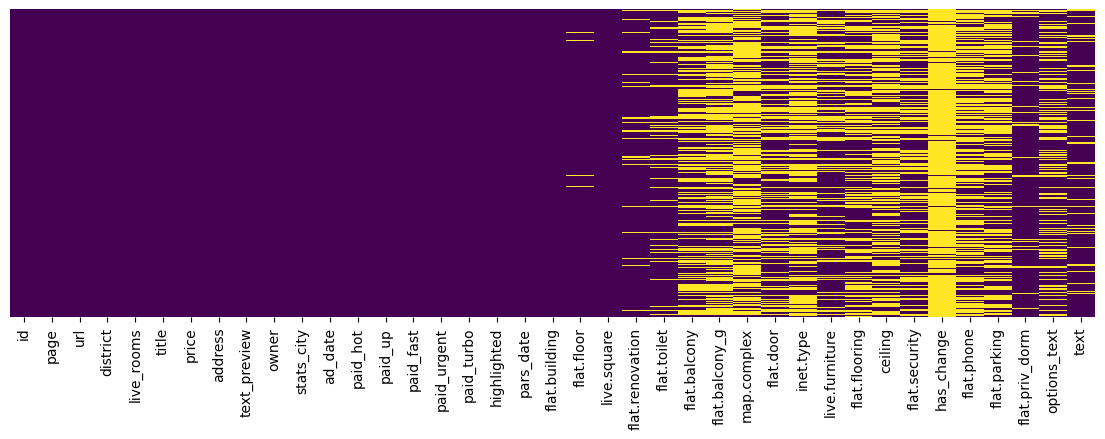

In [15]:
plt.figure(figsize=(14, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

–ü–µ—Ä–µ–¥ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π —Å–æ—Ö—Ä–∞–Ω–∏–º –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç

In [16]:
data = copy.deepcopy(df)

### –£—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –¥—É–±–ª–µ–π

In [17]:
df.id.value_counts(ascending=True)[:3]

id
665357177    1
665738140    1
665740942    1
Name: count, dtype: int64

In [18]:
valuable_columns = list(df.columns)
valuable_columns.remove('id')
valuable_columns.remove('page')
valuable_columns.remove('url')
valuable_columns.remove('ad_date')
valuable_columns.remove('pars_date')
print(valuable_columns)

['district', 'live_rooms', 'title', 'price', 'address', 'text_preview', 'owner', 'stats_city', 'paid_hot', 'paid_up', 'paid_fast', 'paid_urgent', 'paid_turbo', 'highlighted', 'flat.building', 'flat.floor', 'live.square', 'flat.renovation', 'flat.toilet', 'flat.balcony', 'flat.balcony_g', 'map.complex', 'flat.door', 'inet.type', 'live.furniture', 'flat.flooring', 'ceiling', 'flat.security', 'has_change', 'flat.phone', 'flat.parking', 'flat.priv_dorm', 'options_text', 'text']


In [19]:
df.drop_duplicates(subset=valuable_columns, inplace=True, keep='last', ignore_index=True)

In [20]:
len(df)

92528

### –°—Ç–æ–ª—å–∫–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –æ—Å—Ç–∞–Ω–µ—Ç—Å—è, –µ—Å–ª–∏ –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ "–∑–Ω–∞—á–∏–º—ã–µ —Å—Ç–æ–ª–±—Ü—ã" –∏ —É–¥–∞–ª–∏—Ç—å –¥—É–±–ª–∏.

## 2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –£–¥–∞–ª—è–µ–º –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

In [21]:
df.drop(['id', 'page', 'url', 'pars_date', 'stats_city'], axis=1, inplace=True)

### "–ó–∞–∫–æ–¥–∏—Ä—É–µ–º" –ø–µ—Ä–≤—É—é –≥—Ä—É–ø–ø—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (Label Encoding)

In [22]:
cat_f_1 = ['district', 'owner']

In [23]:
for col in cat_f_1:
    print(col, df[col].nunique(), '\n', df[col].value_counts(), '\n')

district 8 
 district
almaty-bostandykskij    28676
almaty-aujezovskij      18990
almaty-almalinskij      18501
almaty-medeuskij        10231
almaty-alatauskij        5003
almaty-nauryzbajskiy     3983
almaty-zhetysuskij       3979
almaty-turksibskij       3165
Name: count, dtype: int64 

owner 7 
 owner
–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç                54629
–•–æ–∑—è–∏–Ω –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏       22119
–ü—Ä–æ–≤–µ—Ä–µ–Ω–Ω—ã–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç     9853
–ü—Ä–æ–≤–µ—Ä–µ–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏—è       2977
–ö–æ–º–ø–∞–Ω–∏—è                   2877
–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ—à—Ç—Ä–∞—Ñ–æ–≤–∞–Ω        49
–ù–∞ –ø—Ä–æ–≤–µ—Ä–∫–µ                  24
Name: count, dtype: int64 



In [24]:
# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in cat_f_1:
    df[col] = df[col].astype('category').cat.codes

In [25]:
#–ü—Ä–æ–≤–µ—Ä—è–µ–º
for col in cat_f_1:
    print(col, df[col].nunique(), '\n', df[col].value_counts(), '\n')

district 8 
 district
3    28676
2    18990
1    18501
4    10231
0     5003
5     3983
7     3979
6     3165
Name: count, dtype: int64 

owner 7 
 owner
4    54629
6    22119
3     9853
2     2977
0     2877
5       49
1       24
Name: count, dtype: int64 



### –¢–µ–ø–µ—Ä—å –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ live_rooms, title, flat.floor –∏ live.square –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç, –ø–ª–æ—â–∞–¥–∏, —ç—Ç–∞–∂, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ. –¢–∞–∫–∂–µ, –±—É–¥—É—Ç –ø–æ–ª–µ–∑–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ –ü–µ—Ä–≤—ã–π —ç—Ç–∞–∂, –ü–æ—Å–ª–µ–¥–Ω–∏–π —ç—Ç–∞–∂, –û—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏ –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç.

–û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏–∏

In [26]:
def extract_live_rooms(str_title):
    return int(str_title.split(', ', 2)[0].split('-', 1)[0])

In [27]:
def extract_total_square(str_title):
    return float(str_title.split(', ', 2)[1].split(' –º¬≤', 1)[0])

In [28]:
def extract_total_square1(str_title):
    return float(str_title.split(', ', 2)[0].split(' –º¬≤', 1)[0])

In [29]:
def extract_living_square(str_title):
    if '–∂–∏–ª–∞—è' in str_title:
        return float(str_title.split(', ', 2)[1].split('–∂–∏–ª–∞—è ‚Äî ', 1)[1].split(' –º¬≤', 1)[0])
    else:
        return 0.0

In [30]:
def extract_kitchen_square(str_title):
    if '–∫—É—Ö–Ω—è' in str_title:
        if '–∂–∏–ª–∞—è' in str_title:
            return float(str_title.split(', ', 2)[2].split('–∫—É—Ö–Ω—è ‚Äî ', 1)[1].split(' –º¬≤', 1)[0])
        else:
            return float(str_title.split(', ', 2)[1].split('–∫—É—Ö–Ω—è ‚Äî ', 1)[1].split(' –º¬≤', 1)[0])
        
    else:
        return 0.0

In [31]:
def extract_flat_floor(str_title):
    temp_arr = str_title.split(', ', 2)
    if len(temp_arr) >=3:
        temp_str = temp_arr[2]
        if '/' in temp_str:
            return int(temp_str.split('/', 1)[0])
        else:
            return int(temp_str.split(' —ç—Ç–∞–∂', 1)[0])
    else:
        return 0

In [32]:
def extract_building_floor(str_title):
    temp_arr = str_title.split(', ', 2)
    if len(temp_arr) >=3:
        temp_str = temp_arr[2]
        if '/' in temp_str:
            return int(temp_str.split('/', 1)[1].split(' —ç—Ç–∞–∂', 1)[0])
        else:
            return 0
    else:
        #print(str_title)
        return 0

In [33]:
def extract_flat_floor1(str_flat_floor):
    str_flat_floor_temp = str(str_flat_floor)
    if str_flat_floor_temp != 'nan':
        if ' –∏–∑ ' in str_flat_floor_temp:
            return int(str_flat_floor_temp.split(' –∏–∑ ', 1)[0])
        else:
            return int(str_flat_floor_temp)
    else:
        return 0

In [34]:
def extract_building_floor1(str_flat_floor):
    str_flat_floor_temp = str(str_flat_floor)
    if str_flat_floor_temp != 'nan':
        if ' –∏–∑ ' in str_flat_floor_temp:
            return int(str_flat_floor_temp.split(' –∏–∑ ', 1)[1])
        else:
            return 0
    else:
        return 0

–ò–∑–≤–ª–µ–∫–∞–µ–º –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏

### live_rooms

In [35]:
df['live_rooms1'] = df.title.apply(lambda x: extract_live_rooms(x))

In [36]:
df_temp = df[df.live_rooms <= 4]
df_temp[(df_temp.live_rooms - df_temp.live_rooms1) != 0]

Empty DataFrame
Columns: [district, live_rooms, title, price, address, text_preview, owner, ad_date, paid_hot, paid_up, paid_fast, paid_urgent, paid_turbo, highlighted, flat.building, flat.floor, live.square, flat.renovation, flat.toilet, flat.balcony, flat.balcony_g, map.complex, flat.door, inet.type, live.furniture, flat.flooring, ceiling, flat.security, has_change, flat.phone, flat.parking, flat.priv_dorm, options_text, text, live_rooms1]
Index: []

–≠—Ç–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –º—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∏–∑–≤–ª–µ–∫–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç –∏–∑ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –æ–±—ä—è–≤–ª–µ–Ω–∏—è

In [37]:
df.live_rooms = df.live_rooms1

**total_square, living_square, kitchen_square**

In [38]:
df['total_square'] = df.title.apply(lambda x: extract_total_square(x))

In [39]:
df['total_square1'] = df['live.square'].apply(lambda x: extract_total_square1(x))

In [40]:
df[df.total_square != df.total_square1]

Empty DataFrame
Columns: [district, live_rooms, title, price, address, text_preview, owner, ad_date, paid_hot, paid_up, paid_fast, paid_urgent, paid_turbo, highlighted, flat.building, flat.floor, live.square, flat.renovation, flat.toilet, flat.balcony, flat.balcony_g, map.complex, flat.door, inet.type, live.furniture, flat.flooring, ceiling, flat.security, has_change, flat.phone, flat.parking, flat.priv_dorm, options_text, text, live_rooms1, total_square, total_square1]
Index: []

–ö–æ–ª–æ–Ω–∫–∏ total_square –∏ total_square1 —Å–æ–≤–ø–∞–¥–∞—é—Ç

In [41]:
df['living_square'] = df['live.square'].apply(lambda x: extract_living_square(x))

In [42]:
df['kitchen_square'] = df['live.square'].apply(lambda x: extract_kitchen_square(x))

### flat_floor

In [43]:
df['flat_floor'] = df.title.apply(lambda x: extract_flat_floor(x))

In [44]:
df['flat_floor1'] = df['flat.floor'].apply(lambda x: extract_flat_floor1(x))

In [45]:
df['flat_floor'] = np.where(df['flat_floor'] == 0, df['flat_floor1'], df['flat_floor'])

In [46]:
df[df['flat_floor'] != df['flat_floor1']]

Empty DataFrame
Columns: [district, live_rooms, title, price, address, text_preview, owner, ad_date, paid_hot, paid_up, paid_fast, paid_urgent, paid_turbo, highlighted, flat.building, flat.floor, live.square, flat.renovation, flat.toilet, flat.balcony, flat.balcony_g, map.complex, flat.door, inet.type, live.furniture, flat.flooring, ceiling, flat.security, has_change, flat.phone, flat.parking, flat.priv_dorm, options_text, text, live_rooms1, total_square, total_square1, living_square, kitchen_square, flat_floor, flat_floor1]
Index: []

–¢–µ–ø–µ—Ä—å –∫–æ–ª–æ–Ω–∫–∏ flat_floor –∏ flat_floor1 —Å–æ–≤–ø–∞–¥–∞—é—Ç

### building_floor

In [47]:
df['building_floor'] = df.title.apply(lambda x: extract_building_floor(x))

In [48]:
df['building_floor1'] = df['flat.floor'].apply(lambda x: extract_building_floor1(x))

In [49]:
df[df['building_floor'] != df['building_floor1']]

Empty DataFrame
Columns: [district, live_rooms, title, price, address, text_preview, owner, ad_date, paid_hot, paid_up, paid_fast, paid_urgent, paid_turbo, highlighted, flat.building, flat.floor, live.square, flat.renovation, flat.toilet, flat.balcony, flat.balcony_g, map.complex, flat.door, inet.type, live.furniture, flat.flooring, ceiling, flat.security, has_change, flat.phone, flat.parking, flat.priv_dorm, options_text, text, live_rooms1, total_square, total_square1, living_square, kitchen_square, flat_floor, flat_floor1, building_floor, building_floor1]
Index: []

–ö–æ–ª–æ–Ω–∫–∏ building_floor –∏ building_floor1 —Å–æ–≤–ø–∞–¥–∞—é—Ç

–£–¥–∞–ª–∏–º "–ª–∏—à–Ω–∏–µ" –∫–æ–ª–æ–Ω–∫–∏:

In [50]:
df.drop(['live_rooms1', 'flat_floor1', 'flat.floor', 'title', 'building_floor1', 'live.square', 'total_square1'], axis=1, inplace=True)

–¢–µ–ø–µ—Ä—å –µ—â–µ —Ä–∞–∑ —É–¥–∞–ª–∏–º –¥—É–±–ª–∏, —Ç–∞–∫ –∫–∞–∫ —Å–æ—Å—Ç–∞–≤ —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–∑–º–µ–Ω–∏–ª—Å—è
**–ó–¥–µ—Å—å –Ω—É–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å —Å–ø–æ—Å–æ–± —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–µ–π, —Å–æ—Å—Ç–∞–≤ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç–∏!**

In [51]:
valuable_columns = \
['district', 'live_rooms', 'price', 'owner', 'flat.building', 'total_square', 'flat_floor', 'building_floor']

In [52]:
df.drop_duplicates(subset=valuable_columns, inplace=True, keep='last', ignore_index=True)
len(df)

61328

**–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º–∏ –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ live_rooms, total_square, living_square, kitchen_square, flat_floor, building_floor –∏ –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–≤—ã–±—Ä–æ—Å—ã).**

### live_rooms

In [53]:
df.live_rooms.value_counts(dropna=False)

live_rooms
2     21512
3     20174
1     14135
4      4434
5       719
6       191
7        84
8        35
9        21
12       11
10        8
32        1
20        1
11        1
14        1
Name: count, dtype: int64

–í–∏–¥–Ω–æ, —á—Ç–æ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç > 8 –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –æ—á–µ–Ω—å –º–∞–ª—ã–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π. –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–∞–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö –±—É–¥–µ—Ç –Ω–∏–∑–∫–æ–π. –£–¥–∞–ª–∏–º –∏—Ö.

In [54]:
df.drop(df[df.live_rooms > 8].index, inplace=True)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 61284, –°—Ä–µ–¥–Ω–µ–µ: 2.301, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.984.
–ú–∏–Ω–∏–º—É–º: 1, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 2.0, –ú–µ–¥–∏–∞–Ω–∞: 2.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 3.0, –ú–∞–∫—Å–∏–º—É–º: 8, IQR: 1.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [0.5, 4.5]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  1029


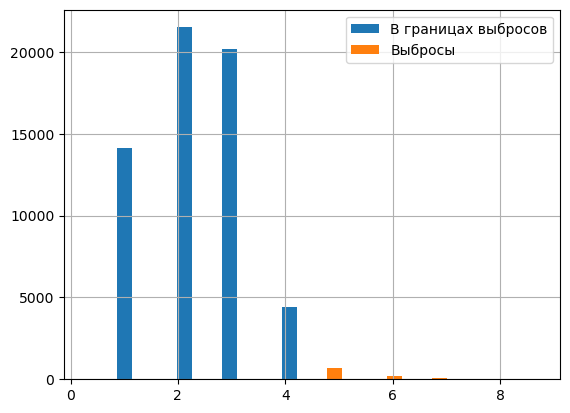

In [55]:
utils.analyse_numeric(df, 'live_rooms')

**–ó–¥–µ—Å—å, –≤–æ–∑–º–æ–∂–Ω–æ, –Ω—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –≤—Å–µ –∑–∞–ø–∏—Å–∏ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º live_rooms > 4**

In [56]:
df.drop(df[df.live_rooms > 4].index, inplace=True)

In [57]:
len(df)

60255

### total_square

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 60255, –°—Ä–µ–¥–Ω–µ–µ: 66.569, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 33.075.
–ú–∏–Ω–∏–º—É–º: 8.97, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 44.0, –ú–µ–¥–∏–∞–Ω–∞: 60.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 78.0, –ú–∞–∫—Å–∏–º—É–º: 450.0, IQR: 34.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-7.0, 129.0]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  3409


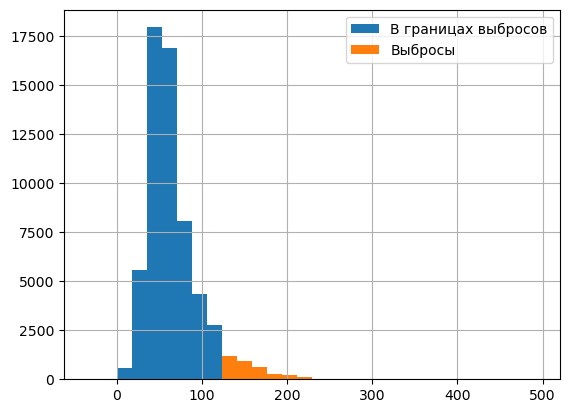

In [58]:
utils.analyse_numeric(df, 'total_square')

–ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø–ª–æ—â–∞–¥—å—é > 180 –º¬≤ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∞–Ω–æ–º–∞–ª–∏—è–º–∏. **–≠—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω—É–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å** 

In [59]:
df.drop(df[df.total_square > 180].index, inplace=True)

### living_square –∏ kitchen_square

In [60]:
df.loc[df.living_square >= df.total_square, 'living_square'] = 0

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59657, –°—Ä–µ–¥–Ω–µ–µ: 14.664, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 22.314.
–ú–∏–Ω–∏–º—É–º: 0.0, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.0, –ú–µ–¥–∏–∞–Ω–∞: 0.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 28.5, –ú–∞–∫—Å–∏–º—É–º: 162.4, IQR: 28.5.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-42.75, 71.25]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  1430


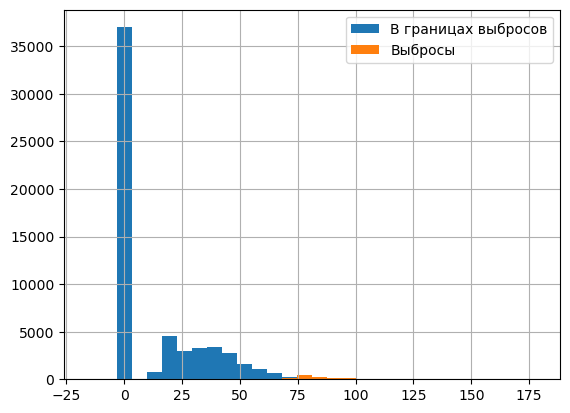

In [61]:
utils.analyse_numeric(df, 'living_square')

–ü—Ä–∏–∑–Ω–∞–∫ **living_square** –Ω–µ —Ç–∞–∫ –≤–∞–∂–µ–Ω –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤. –õ—É—á—à–µ –µ–≥–æ —É–¥–∞–ª–∏—Ç—å.

In [62]:
df.drop(['living_square'], axis=1, inplace=True)

In [63]:
df.loc[df.kitchen_square >= df.total_square, 'kitchen_square'] = 0

In [64]:
len(df[df.kitchen_square == 0])

19952

**–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–º–µ–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –º–µ–¥–∏–∞–Ω–æ–π, –ª–∏–±–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –Ω—É–ª–µ–≤—ã–º (0)**

In [65]:
#df.loc[df.kitchen_square == 0, 'kitchen_square'] = df.kitchen_square.median()

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59657, –°—Ä–µ–¥–Ω–µ–µ: 6.755, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 6.042.
–ú–∏–Ω–∏–º—É–º: 0.0, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 0.0, –ú–µ–¥–∏–∞–Ω–∞: 6.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 10.7, –ú–∞–∫—Å–∏–º—É–º: 80.0, IQR: 10.7.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-16.049999999999997, 26.749999999999996]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  289


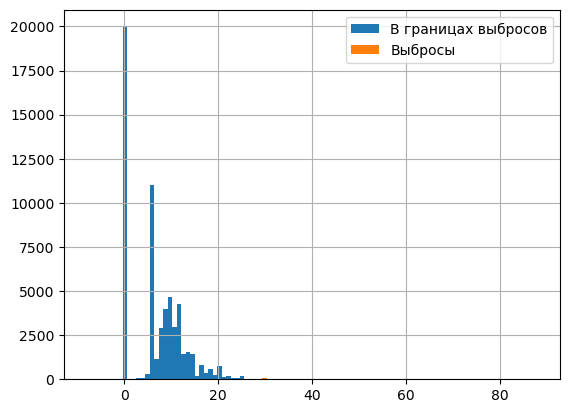

In [66]:
utils.analyse_numeric(df, 'kitchen_square', bns=100)

### flat_floor

In [67]:
df['flat_floor'].value_counts(dropna=False)

flat_floor
2     8980
4     8365
3     8295
1     7704
5     7521
6     2879
8     2811
9     2787
7     2769
10    1618
12    1155
11    1041
0      770
13     574
14     557
16     518
15     503
17     245
18     180
19     137
20      90
21      80
25      23
22      22
23      11
24      10
26       6
27       2
99       1
58       1
77       1
70       1
Name: count, dtype: int64

In [68]:
df[df['flat_floor'] > 25]

district  live_rooms     price  \
7835          2           3  28499900   
9527          3           2  64000000   
15099         3           3  28000000   
27216         1           3  35000000   
29901         3           2  60000000   
31321         3           2  54000000   
35407         3           2  59000000   
36401         3           2  79000000   
37053         3           2  64000000   
37113         3           2  79000000   
37728         3           2  75000000   
43100         4           2  74000000   

                                                                   address  \
7835                            –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ñ–µ—Ç—ã—Å—É-1, –ú–∫—Ä –ñ–µ—Ç—ã—Å—É-1   
9527                           –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ 7 ‚Äî –ö–æ–∑—ã–±–∞–µ–≤–∞   
15099                                             –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏   
27216                              –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –†–∞–π—ã–º–±–µ–∫–∞ 243   
29901                                      –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ 7   
31321                                         –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –•–æ–¥–∂–∞–Ω–æ–≤–∞   
35407  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ù—É—Ä–ª—ã—Ç–∞—É (–≠–Ω–µ—Ä–≥–µ—Ç–∏–∫) 7 ‚Äî –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–ª—å-–§–∞—Ä–∞–±–∏   
36401                            –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ ‚Äî –ö–æ–∑—ã–±–∞–µ–≤–∞   
37053                          –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ 7 ‚Äî –ö–æ–∑—ã–±–∞–µ–≤–∞   
37113                                        –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏   
37728                                        –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏   
43100                                –ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω, –ê–ª—å-–§–∞—Ä–∞–±–∏ ‚Äî –ö–æ–∑—ã–±–∞–µ–≤–∞   

                                                                                                                                                                                                  text_preview  \
7835   –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1989 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 55 –∫–≤.–º., –∫—É—Ö–Ω—è 15 –∫–≤.–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –í–ù–ò–ú–ê–ù–ò–ï! 3-—Ö –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤...   
9527           –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ù—É—Ä–ª—ã –¢–∞—É, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2005 –≥.–ø., –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞, 2 —Å—É, –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π —à–∫–∞—Ñ - –∫—É–ø–µ, —É–¥–æ–±–Ω—ã–π –∫—É—Ö–æ–Ω–Ω—ã–π –≥–∞—Ä–Ω–∏—Ç—É—Ä, –ø–∞—Ä–∫–∏–Ω–≥. –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø—Ä–æ–¥–∞–µ—Ç—Å—è –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å –º–µ–±–µ–ª—å—é –∏ —Ç–µ—Ö–Ω–∏–∫–æ–π   
15099  –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1973 –≥.–ø., –¢–µ–ø–ª–∞—è, —Å–≤–µ—Ç–ª–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —Å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π —Ü–µ–Ω–æ–π. –î–æ–∫—É–º–µ–Ω—Ç—ã –≤ –ø–æ—Ä—è–¥–∫–µ. –°–≤–µ—Ç–ª–∞—è, —É—é—Ç–Ω–∞—è. –ß–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–µ–ª—å –æ—Å—Ç–∞–µ—Ç—Å—è. –•–æ—Ä–æ—à–∏–π –¥–≤–æ—Ä, –ø—Ä–∏–≤–µ—Ç–ª–∏–≤—ã–µ, —É–ª–±—ã—á–∏–≤—ã–µ —Å–æ—Å–µ...   
27216                                                             –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2007 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   
29901  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ù—É—Ä–ª—ã –¢–∞—É, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2005 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.85–º., —Å–∞–Ω—É–∑–µ–ª 2 —Å/—É –∏ –±–æ–ª–µ–µ, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –í–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç...   
31321  –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2007 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –µ—Å—Ç—å –

–í–∏–∑—É–∞–ª—å–Ω—ã–π –ø—Ä–æ—Å–º–æ—Ç—Ä –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è –ø–æ –∫–≤–∞—Ä—Ç–∏—Ä–∞–º —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º —ç—Ç–∞–∂–∞ > 25 —Å–æ–¥–µ—Ä–∂–∞—Ç –æ—à–∏–±–∫–∏, –¥—É–±–ª–∏ –∏ –∏—Ö –º–∞–ª–æ. –£–¥–∞–ª–∏–º –∑–∞–ø–∏—Å–∏ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º > 20.

In [69]:
df.drop(df[df.flat_floor > 20].index, inplace=True)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59499, –°—Ä–µ–¥–Ω–µ–µ: 4.878, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 3.644.
–ú–∏–Ω–∏–º—É–º: 0, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 2.0, –ú–µ–¥–∏–∞–Ω–∞: 4.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 7.0, –ú–∞–∫—Å–∏–º—É–º: 20, IQR: 5.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-5.5, 14.5]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  1673


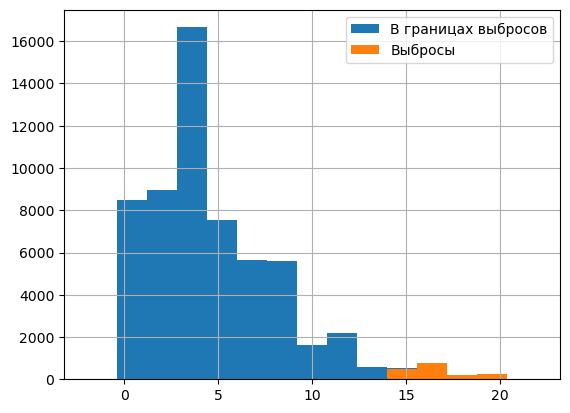

In [70]:
utils.analyse_numeric(df, 'flat_floor', bns=15)

**–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–º–µ–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –º–µ–¥–∏–∞–Ω–æ–π, –ª–∏–±–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –Ω—É–ª–µ–≤—ã–º (0)**

In [71]:
df.loc[df.flat_floor == 0, 'flat_floor'] = df.flat_floor.median()

### building_floor

In [72]:
df['building_floor'].value_counts(dropna=False)

building_floor
5      16138
9       8609
4       8293
12      4625
10      3283
16      2709
13      1828
3       1794
0       1633
6       1546
2       1146
14      1074
15       921
18       907
17       891
7        853
8        845
21       682
11       403
20       400
25       281
22       246
19       178
1        111
23        30
33        29
30        24
32         4
29         4
31         2
24         2
54         1
76         1
100        1
49         1
98         1
121        1
252        1
28         1
Name: count, dtype: int64

In [73]:
df[df['building_floor'] > 33]

district  live_rooms     price  \
7188          3           4  42500000   
15037         3           3  75000000   
15761         3           3  50100000   
18263         1           2  25500000   
31237         3           2  35800000   
32815         2           2  25000000   
35712         3           2  31000000   

                                                                     address  \
7188                                     –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –†–æ–∑—ã–±–∞–∫–∏–µ–≤–∞ 153–ê   
15037                                   –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –ì–∞–≥–∞—Ä–∏–Ω–∞   
15761                                               –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏   
18263  –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ú–∞–∫–∞—Ç–∞–µ–≤–∞ (–ü–∞—Å—Ç–µ—Ä–∞) ‚Äî –ê–±—ã–ª–∞–π —Ö–∞–Ω–∞ (–ö–æ–º–º—É–Ω–∏—Å—Ç–∏—á–µ—Å–∫–∏–π)   
31237                                             –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ñ–∞–º–±—ã–ª–∞   
32815                                         –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ê–∫—Å–∞–π-1 25   
35712                                       –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ö–∞–±–ª—É–∫–æ–≤–∞ 264   

                                                                                                                                                                                                  text_preview  \
7188   –∫–∏—Ä–ø–∏—á–Ω—ã–π –¥–æ–º, 1974 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –ë–∞–ª–∫–æ–Ω –¥–æ–≤–æ–ª—å–Ω–æ –ø—Ä–æ—Å—Ç–æ—Ä–Ω—ã–π –î–æ–º –ø–æ—Å–ª–µ –∫–∞–ø–∏—Ç–∞–ª—å–Ω–æ–≥–æ —Ä–µ–º–æ–Ω—Ç–∞ –ö–≤–∞—Ä—Ç–∏—Ä–∞ –æ—á–µ–Ω—å...   
15037                                                                                       –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2018 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, —Å–∞–Ω—É–∑–µ–ª 2 —Å/—É –∏ –±–æ–ª–µ–µ, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   
15761  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –¢–∞—É –°–∞–º–∞–ª –Ω–∞ –ù–∞–≤–æ–∏, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2011 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 55 –∫–≤.–º., –∫—É—Ö–Ω—è 19 –∫–≤.–º., –ø–æ—Ç–æ–ª–∫–∏ 3–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –û—Ç —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ –∫–æ–º–ø–∞–Ω...   
18263  –∫–∏—Ä–ø–∏—á–Ω—ã–π –¥–æ–º, 1979 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Å—Ä–µ–¥–Ω–µ–µ, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 30 –∫–≤.–º., –∫—É—Ö–Ω—è 9 –∫–≤.–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, –ø—É—Å—Ç–∞—è, (‚Ññ61387) 2 –ö–û–ú–¢–ù–ê–¢–ù–ê–Ø —É–ª–£–ß–®–ï–ù–ù–û–ô –ü–õ–ê–ù–ò–†–û–í–ö–ò, –ù–ï–£–ì–õ–û–í–ê–Ø –ö–í–ê–†–¢–ò–†–ê. –£–¥–æ–±–Ω–∞—è —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–∞...   
31237  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ê–ª–º–∞-–ê—Ç–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2015 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 3–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –û—Ç–ª–∏—á–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø–æ —Ö–æ—Ä–æ—à–µ–π —Ü–µ–Ω–µ...   
32815  –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1994 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –°—Ä–æ—á–Ω–æ! –ü—Ä–æ–¥–∞–º –æ—Ç–ª–∏—á–Ω—É—é 2-—Ö –∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É, –≤ –•–û–†–û–®–ï–ú...   
35712                             –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Mega Tower Almaty, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2016 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   

       owner  ad_date  paid_hot  paid_up  paid_fast  paid_urgent  paid_turbo  \
7188       4  22 –º–∞—Ä.         0        0          0            0           0   
15037      4   6 –º–∞—Ä.         0        0          0          

–£–¥–∞–ª–∏–º –∑–∞–ø–∏—Å–∏ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º > 33

In [74]:
df.drop(df[df.building_floor > 33].index, inplace=True)

**–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–º–µ–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –º–µ–¥–∏–∞–Ω–æ–π, –ª–∏–±–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –Ω—É–ª–µ–≤—ã–º (0)**

In [75]:
df.loc[df.building_floor == 0, 'building_floor'] = df.building_floor.median()

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59492, –°—Ä–µ–¥–Ω–µ–µ: 8.270, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 4.693.
–ú–∏–Ω–∏–º—É–º: 1, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 5.0, –ú–µ–¥–∏–∞–Ω–∞: 6.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 11.0, –ú–∞–∫—Å–∏–º—É–º: 33, IQR: 6.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-4.0, 20.0]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  1305


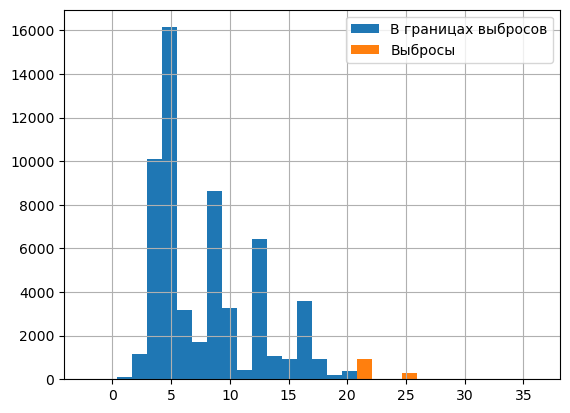

In [76]:
utils.analyse_numeric(df, 'building_floor')

In [77]:
df.sample(1)

district  live_rooms     price                   address  \
59336         3           3  59000000  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏   

                                                                                                                                                                                                  text_preview  \
59336  –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2014 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –ö–æ–¥ –æ–±—ä–µ–∫—Ç–∞ #5601469 –£–≤–∞–∂–∞–µ–º—ã–µ –≥–æ—Å—Ç–∏ –∏ –∂–∏—Ç–µ–ª–∏ –≥. –ê–ª–º–∞—Ç—ã! –ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–æ–µ –∞–≥–µ–Ω—Ç—Å—Ç–≤–æ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ "–≠—Ç–∞–∂–∏" –ø...   

       owner  ad_date  paid_hot  paid_up  paid_fast  paid_urgent  paid_turbo  \
59336      4  26 –º–∞—Ä.         0        0          0            0           0   

       highlighted          flat.building flat.renovation flat.toilet  \
59336            0  –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2014 –≥.–ø.      –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç  —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π   

      flat.balcony flat.balcony_g map.complex      flat.door inet.type  \
59336          NaN            NaN         NaN  –º–µ—Ç–∞–ª–ª–∏—á–µ—Å–∫–∞—è       NaN   

              live.furniture flat.flooring ceiling  \
59336  –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞       –ª–∞–º–∏–Ω–∞—Ç     NaN   

                                    flat.security has_change flat.phone  \
59336  –æ—Ö—Ä–∞–Ω–∞, –¥–æ–º–æ—Ñ–æ–Ω, –≤–∏–¥–µ–æ–Ω–∞–±–ª—é–¥–µ–Ω–∏–µ, –∫–æ–Ω—Å—å–µ—Ä–∂        NaN        NaN   

                   flat.parking flat.priv_dorm  \
59336  —Ä—è–¥–æ–º –æ—Ö—Ä–∞–Ω—è–µ–º–∞—è —Å—Ç–æ—è–Ω–∫–∞            –Ω–µ—Ç   

                                            options_text  \
59336  –ü–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –æ–∫–Ω–∞, –∫—É—Ö–Ω—è-—Å—Ç—É–¥–∏—è, –≤—Å—Ç—Ä–æ–µ–Ω–Ω–∞—è –∫—É—Ö–Ω—è.   

                                                                                                                                                                                                          text  \
59336  –ö–æ–¥ –æ–±—ä–µ–∫—Ç–∞ #5601469 \n–£–≤–∞–∂–∞–µ–º—ã–µ –≥–æ—Å—Ç–∏ –∏ –∂–∏—Ç–µ–ª–∏ –≥. –ê–ª–º–∞—Ç—ã! \n–ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–æ–µ –∞–≥–µ–Ω—Ç—Å—Ç–≤–æ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ "–≠—Ç–∞–∂–∏" –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –í–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é —Ç—Ä–µ—Ö–∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –ñ–ö "–®–∞—Ö—Ä–∏—Å—Ç–∞–Ω". \n–í –∫–≤–∞—Ä—Ç–∏—Ä–µ —Å–¥–µ–ª–∞–Ω ...   

       total_square  kitchen_square  flat_floor  building_floor  
59336         101.3             0.0          12              18

### price - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59492, –°—Ä–µ–¥–Ω–µ–µ: 32996811.066, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 21842496.452.
–ú–∏–Ω–∏–º—É–º: 2500000, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 20000000.0, –ú–µ–¥–∏–∞–Ω–∞: 26500000.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 38500000.0, –ú–∞–∫—Å–∏–º—É–º: 555000000, IQR: 18500000.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-7750000.0, 66250000.0]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  4143


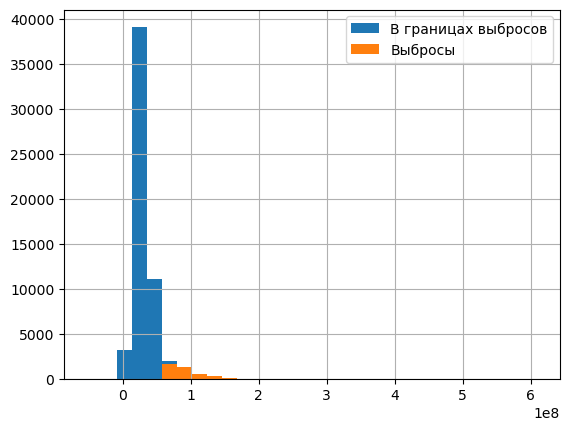

In [78]:
utils.analyse_numeric(df, 'price')

–ö–≤–∞—Ä—Ç–∏—Ä—ã —Ü–µ–Ω–æ–π > 200000000 (200 –º–ª–Ω. —Ç–µ–Ω–≥–µ) –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∞–Ω–æ–º–∞–ª–∏—è–º–∏. –≠—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω—É–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å

In [79]:
df.drop(df[df.price > 200000000].index, inplace=True)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59456, –°—Ä–µ–¥–Ω–µ–µ: 32860125.841, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 21046296.375.
–ú–∏–Ω–∏–º—É–º: 2500000, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 20000000.0, –ú–µ–¥–∏–∞–Ω–∞: 26500000.0, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 38500000.0, –ú–∞–∫—Å–∏–º—É–º: 200000000, IQR: 18500000.0.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-7750000.0, 66250000.0]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  4107


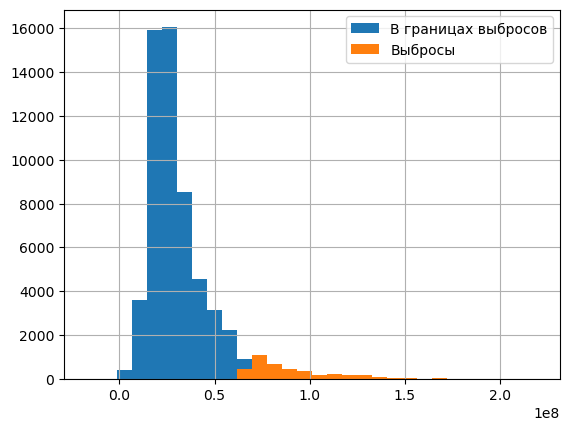

In [80]:
utils.analyse_numeric(df, 'price')

–ü–æ—Ä—è–¥–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ü–µ–Ω—ã –º–æ–∂–Ω–æ –ø–æ–Ω–∏–∑–∏—Ç—å, –ø–æ–¥–µ–ª–∏–≤ –≤—Å–µ –Ω–∞ 1000000.0

In [81]:
df.price = df.price / 1000000.0

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 59456, –°—Ä–µ–¥–Ω–µ–µ: 32.860, –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 21.046.
–ú–∏–Ω–∏–º—É–º: 2.5, 25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 20.0, –ú–µ–¥–∏–∞–Ω–∞: 26.5, 75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 38.5, –ú–∞–∫—Å–∏–º—É–º: 200.0, IQR: 18.5.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ:  0
–ì—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤: [-7.75, 66.25]. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:  4107


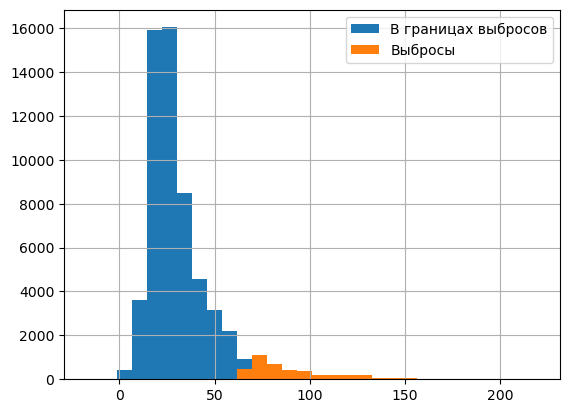

In [82]:
#plt.rcParams['figure.figsize'] = (10,7)
utils.analyse_numeric(df, 'price')

### ad_date - –¥–∞—Ç–∞ –ø–æ–¥–∞—á–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è.
–í–æ–∑–º–æ–∂–Ω–æ, –Ω–∞–º –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫ days - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –º–µ–∂–¥—É –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –¥–∞—Ç–æ–π –∏ –¥–∞—Ç–æ–π –ø–æ–¥–∞—á–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –µ—Å–ª–∏, –∫ –ø—Ä–∏–º–µ—Ä—É, –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º –¥–æ—Ä–æ–∂–∞—é—Ç.

In [83]:
df.ad_date.value_counts()[:5]

ad_date
26 –º–∞—Ä.    3697
25 –º–∞—Ä.    3489
27 –º–∞—Ä.    3131
24 –º–∞—Ä.    2976
1 –º–∞—Ä.     2781
Name: count, dtype: int64

In [84]:
loca = locale.getlocale()
loca

('en_US', 'UTF-8')

In [85]:
locale.setlocale(locale.LC_ALL, 'ru_RU.utf8')  # ru_RU

'ru_RU.utf8'

In [86]:
df.ad_date = df.ad_date.apply(lambda x: x.replace('.', ' 2021'))

In [87]:
df.ad_date = df.ad_date.apply(lambda x: x.replace('—Ñ–µ–≤—Ä', '—Ñ–µ–≤'))

In [88]:
df.ad_date.value_counts()[::6]

ad_date
26 –º–∞—Ä 2021    3697
9 –º–∞—Ä 2021     2591
18 –º–∞—Ä 2021    2166
16 –º–∞—Ä 2021    2046
21 –º–∞—Ä 2021    1091
Name: count, dtype: int64

In [89]:
df.ad_date = pd.to_datetime(df.ad_date, format = '%d %b %Y')

In [90]:
locale.setlocale(locale.LC_ALL, loca)

'en_US.UTF-8'

In [91]:
min(df.ad_date), max(df.ad_date)

(Timestamp('2021-02-28 00:00:00'), Timestamp('2021-03-29 00:00:00'))

In [92]:
max_date = max(df.ad_date)
df['days'] = df.ad_date.apply(lambda x: (max_date - x).days + 1)

<Axes: >

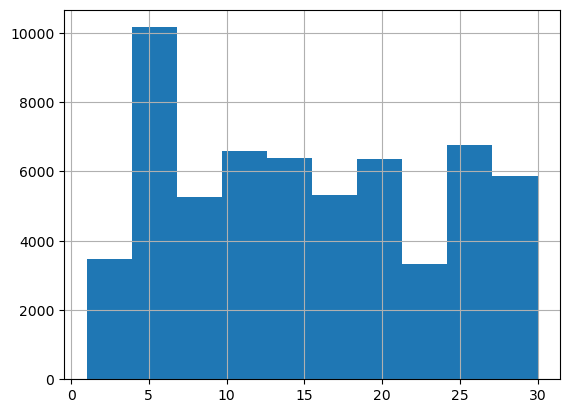

In [93]:
df.days.hist()

In [94]:
df.drop(['ad_date'], axis=1, inplace=True)

In [95]:
len(df)

59456

### flat.building

In [96]:
df['flat.building'].value_counts(dropna=False)

flat.building
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2016 –≥.–ø.    3904
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2017 –≥.–ø.    3006
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2018 –≥.–ø.    2212
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2015 –≥.–ø.    2024
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π, 2020 –≥.–ø.    1641
                         ... 
–∫–∏—Ä–ø–∏—á–Ω—ã–π, 1935 –≥.–ø.        1
4, 1962 –≥.–ø.                1
–∏–Ω–æ–µ, 1992 –≥.–ø.             1
1940 –≥.–ø.                   1
–ø–∞–Ω–µ–ª—å–Ω—ã–π, 1957 –≥.–ø.        1
Name: count, Length: 374, dtype: int64

In [97]:
df['flat.building'].isna().sum()

0

–ò–∑–≤–ª–µ—á–µ–º –ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏

In [98]:
def extract_building_year(str_year):
    arr_tmp = str_year.split(', ', 1)
    if len(arr_tmp) == 1:
        return int(arr_tmp[0].split(' –≥.–ø.', 1)[0])
    elif len(arr_tmp) == 2:
        return int(arr_tmp[1].split(' –≥.–ø.', 1)[0])
    else:
        print(str_year)
        return np.nan

In [99]:
def extract_building_type(str_year):
    arr_tmp = str_year.split(', ', 1)
    if len(arr_tmp) == 1:
        return 'unknown'
    elif len(arr_tmp) == 2:
        return arr_tmp[0]
    else:
        print(str_year)
        return None

In [100]:
PRESENT_YEAR = 2021

In [101]:
df['building_age'] = df['flat.building'].apply(lambda x: extract_building_year(x))

In [102]:
df[df.building_age < 1930]

district  live_rooms   price  \
4624          0           1  13.500   
11844         2           2  20.500   
40212         2           3  37.999   
45856         0           1  13.300   
52851         3           3  80.000   
53987         2           3  28.400   
58457         3           3  35.000   

                                                                  address  \
4624                                         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –°–∞—è–ª—ã 20   
11844                                   –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä ‚Ññ6, –ú–∫—Ä ‚Ññ6 3–ê   
40212                                          –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –°–∞–∏–Ω–∞ 10/3   
45856                                –ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –°–∞—è–ª—ã, –ú–∫—Ä –°–∞—è–ª—ã   
52851                    –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ë–∞–≥–∞–Ω–∞—à—ã–ª, –ê–ª—å-–§–∞—Ä–∞–±–∏ 144   
53987                      –ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω, –ø—Ä–æ—Å–ø–µ–∫—Ç –†–∞–π—ã–º–±–µ–∫–∞ 508 ‚Äî –°–∞–∏–Ω–∞   
58457  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ö–æ–∫—Ç–µ–º-2, –ú–∫—Ä –ö–æ–∫—Ç–µ–º-2 76–± ‚Äî –ì–∞–±–¥—É–ª–∏–Ω–∞ –û–ª–µ—è   

                                                                                                                                                                                                  text_preview  \
4624   –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1915 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, –ø—É—Å—Ç–∞—è, –í–ù–ò–ú–ê–ù–ò–ï –≠–ö–°–ö–õ–Æ–ó–ò–í üî• –ü—Ä–µ–¥–ª–∞–≥–∞–µ–º –≤–∞–º –≤—ã–≥–æ–¥–Ω–æ –ø—Ä–∏–æ–±—Ä–µ—Å—Ç–∏ 1 –∫–æ–º–Ω–∞—Ç–Ω—É—é —É–ª—É—á—à–µ–Ω–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É, –≤ —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ —Ä–∞...   
11844  –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1919 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, –ü–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –æ–∫–Ω–∞, –Ω–µ—É–≥–ª–æ–≤–∞—è, –∫–æ–º–Ω–∞—Ç—ã –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω—ã. –î–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω –ø—Ä—è–º–æ –ø–æ –ê–±–∞—è, –Ω–æ –æ–∫–Ω–∞ –≤—ã—Ö–æ–¥—è—Ç –≤–æ –¥–≤–æ—Ä. –ü–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –æ–∫–Ω–∞, —Ä–µ—à–µ—Ç–∫...   
40212  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –°–∞–º–≥–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1917 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.7–º., —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –°—Ä–æ—á–Ω–∞—è –ø—Ä–æ–¥–∞–∂–∞, —Ä–∞–∑–≤–∏—Ç–∞—è –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞, —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç...   
45856  –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1915 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, –ø—É—Å—Ç–∞—è, –í–ù–ò–ú–ê–ù–ò–ï –≠–ö–°–ö–õ–Æ–ó–ò–í üî• –ü—Ä–µ–¥–ª–∞–≥–∞–µ–º –≤–∞–º –≤—ã–≥–æ–¥–Ω–æ –ø—Ä–∏–æ–±—Ä–µ—Å—Ç–∏ 1 –∫–æ–º–Ω–∞—Ç–Ω—É—é —É–ª—É—á—à–µ–Ω–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É, –≤ —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ —Ä–∞...   
52851  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ì–æ—Ä–Ω–æ–µ –°–æ–ª–Ω—Ü–µ, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1916 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 100 –∫–≤.–º., –∫—É—Ö–Ω—è 20 –∫–≤.–º., –ø–æ—Ç–æ–ª–∫–∏ 3–º., —Å–∞–Ω—É–∑–µ–ª 2 —Å/—É –∏ –±–æ–ª–µ–µ, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –æ–ø—Ç–∏–∫–∞, —á–∞—Å—Ç–∏—á–Ω...   
53987  –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1876 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª —Ä–∞–∑–¥–µ–ª—å–Ω—ã–π, –ö–≤–∞—Ä—Ç–∏—Ä–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–º –∏ —Ä–∞–∑–≤–∏—Ç–æ–º —Ä–∞–π–æ–Ω–µ –≥–æ—Ä–æ–¥–∞. –°–∞–Ω—Ç–µ—Ö–Ω–∏–∫–∞ –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏. –ö–≤–∞—Ä—Ç–∏—Ä–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é –≥–æ—Ç–æ–≤–∞ –∫ –ø—Ä–æ–¥–∞–∂–µ....   
58457  –∫–∏—Ä–ø–∏—á–Ω—ã–π –¥–æ–º, 1868 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 50 –∫–≤.–º., –∫—É—Ö–Ω—è 8 –∫–≤.–º., –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –ö–≤–∞—Ä—Ç–∏—Ä–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞. –£–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∫–æ–º–Ω–æ—Ç –ø—Ä–æ–¥—É–≤–∞–π–º–∞ –∑–∏–º–æ–π –æ—á–µ–Ω—å —Ç–µ...   

       owner  paid_hot  paid_up  paid_fast  paid_urgent  paid_turbo  \
4624       4         0        0          0            0     

–ò—Å–ø—Ä–∞–≤–∏–º –æ—à–∏–±–∫–∏ –≤ –≥–æ–¥–µ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫ –≤–æ–∑—Ä–∞—Å—Ç—É –ø–æ—Å—Ç—Ä–æ–π–∫–∏ + 1

In [103]:
df.building_age = df.building_age.apply(lambda x: x + 100 if x < 1930 else x)
df.building_age = (PRESENT_YEAR + 1) - df.building_age

In [104]:
df.building_age.value_counts()

building_age
6     4191
5     3262
4     2447
7     2215
2     1958
      ... 
92       2
87       1
85       1
86       1
91       1
Name: count, Length: 92, dtype: int64

–¢–µ–ø–µ—Ä—å –∏–∑–≤–ª–µ—á–µ–º –¢–∏–ø –ø–æ—Å—Ç—Ä–æ–π–∫–∏ (–º–∞—Ç–µ—Ä–∏–∞–ª)

In [105]:
df['building_type'] = df['flat.building'].apply(lambda x: extract_building_type(x))

In [106]:
df.building_type.value_counts(dropna=False)

building_type
–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π    26315
–ø–∞–Ω–µ–ª—å–Ω—ã–π     18058
–∫–∏—Ä–ø–∏—á–Ω—ã–π     11582
unknown        2793
–∏–Ω–æ–µ            705
4                 3
Name: count, dtype: int64

In [107]:
df['building_type'] = df['building_type'].astype('category').cat.codes

In [108]:
df.building_type.value_counts(dropna=False)

building_type
4    26315
5    18058
3    11582
1     2793
2      705
0        3
Name: count, dtype: int64

In [109]:
df.drop(['flat.building'], axis=1, inplace=True)

### flat.priv_dorm

In [110]:
df['flat.priv_dorm'].value_counts(dropna=False)

flat.priv_dorm
–Ω–µ—Ç    52505
NaN     5455
–¥–∞      1496
Name: count, dtype: int64

In [111]:
df['flat_priv_dorm'] = df['flat.priv_dorm']

In [112]:
df.loc[df['flat_priv_dorm'].isna(), 'flat_priv_dorm'] = '–Ω–µ—Ç'

In [113]:
df['flat_priv_dorm'] = df['flat_priv_dorm'].astype('category').cat.codes

In [114]:
df['flat_priv_dorm'].value_counts(dropna=False)

flat_priv_dorm
1    57960
0     1496
Name: count, dtype: int64

In [115]:
df.drop(['flat.priv_dorm'], axis=1, inplace=True)

### flat.renovation

In [116]:
df['flat.renovation'].value_counts(dropna=False)

flat.renovation
—Ö–æ—Ä–æ—à–µ–µ                 23347
–µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç              21418
—Å—Ä–µ–¥–Ω–µ–µ                  5000
NaN                      4607
—Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞          1971
—á–µ—Ä–Ω–æ–≤–∞—è –æ—Ç–¥–µ–ª–∫–∞         1888
—Å–≤–æ–±–æ–¥–Ω–∞—è –ø–ª–∞–Ω–∏—Ä–æ–≤–∫–∞     1225
Name: count, dtype: int64

In [117]:
df['flat_renovation'] = df['flat.renovation']

In [118]:
df.loc[df['flat_renovation'].isna(), 'flat_renovation'] = '—Ö–æ—Ä–æ—à–µ–µ'

In [119]:
df['flat_renovation'] = df['flat_renovation'].astype('category').cat.codes

In [120]:
df['flat_renovation'].value_counts(dropna=False)

flat_renovation
4    27954
0    21418
2     5000
3     1971
5     1888
1     1225
Name: count, dtype: int64

In [121]:
df.drop(['flat.renovation'], axis=1, inplace=True)

### flat.toilet

In [122]:
df['flat.toilet'].value_counts(dropna=False)

flat.toilet
—Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π      24928
—Ä–∞–∑–¥–µ–ª—å–Ω—ã–π       16717
NaN               9777
2 —Å/—É –∏ –±–æ–ª–µ–µ     7967
–Ω–µ—Ç                 67
Name: count, dtype: int64

In [123]:
df['flat_toilet'] = df['flat.toilet']

In [124]:
df.loc[df['flat_toilet'].isna(), 'flat_toilet'] = 'unknown'

In [125]:
df['flat_toilet'] = df['flat_toilet'].astype('category').cat.codes

In [126]:
df['flat_toilet'].value_counts(dropna=False)

flat_toilet
4    24928
3    16717
1     9777
0     7967
2       67
Name: count, dtype: int64

In [127]:
df.drop(['flat.toilet'], axis=1, inplace=True)

### live.furniture

In [128]:
df['live.furniture'].value_counts(dropna=False)

live.furniture
—á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞     21533
NaN                      16708
–ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞    16328
–ø—É—Å—Ç–∞—è                    4887
Name: count, dtype: int64

In [129]:
df['live_furniture'] = df['live.furniture']

In [130]:
df.loc[df['live_furniture'].isna(), 'live_furniture'] = '—á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞'

In [131]:
df['live_furniture'] = df['live_furniture'].astype('category').cat.codes

In [132]:
df['live_furniture'].value_counts(dropna=False)

live_furniture
2    38241
0    16328
1     4887
Name: count, dtype: int64

In [133]:
df.drop(['live.furniture'], axis=1, inplace=True)

## 3. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (feature engineering)
–ü–µ—Ä–≤—ã–π —ç—Ç–∞–∂, –ü–æ—Å–ª–µ–¥–Ω–∏–π —ç—Ç–∞–∂, –û—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏ –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç.

In [134]:
df.flat_floor.value_counts()

flat_floor
4     9126
2     8976
3     8287
1     7702
5     7517
6     2877
8     2811
9     2787
7     2765
10    1618
12    1153
11    1041
13     574
14     550
16     518
15     503
17     244
18     180
19     137
20      90
Name: count, dtype: int64

In [135]:
df['first_floor'] = df.flat_floor.apply(lambda x: 1 if x==1 else 0)

In [136]:
df[df.flat_floor > df.building_floor]

district  live_rooms     price  \
218           1           1  24.50000   
296           1           1  20.00000   
388           5           3  34.50000   
429           5           3  34.99900   
622           1           2  28.86092   
...         ...         ...       ...   
60797         3           3  42.50000   
60801         3           3  44.00000   
60849         3           3  59.00000   
60947         3           3  69.00000   
61191         3           3  75.50000   

                                              address  \
218                        –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –ï–≥–∏–∑–±–∞–µ–≤–∞   
296                          –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –¢–æ–ª–µ –±–∏   
388      –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –®—É–≥—ã–ª–∞, –ñ—É–Ω–∏—Å–æ–≤–∞ 14/3   
429                          –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω, –ñ—É–∞–ª—ã   
622                    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω, –¢–æ–ª–µ –±–∏ 189/3   
...                                               ...   
60797                    –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ï–≥–∏–∑–±–∞–µ–≤–∞   
60801          –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏ ‚Äî –¢–æ—Ä–∞–π–≥—ã—Ä–æ–≤–∞   
60849          –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏ ‚Äî –¢–æ—Ä–∞–π–≥—ã—Ä–æ–≤–∞   
60947                        –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –ù–∞–≤–æ–∏   
61191  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω, –º–∫—Ä –ê–ª–º–∞–≥—É–ª—å 230 ‚Äî –ñ–∞—Ä–æ–∫–æ–≤–∞   

                                                                                                                                                                                                  text_preview  \
218                                                                             –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ê—Å—ã–ª –¢–∞—É, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2016 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.7–º., –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –æ–ø—Ç–∏–∫–∞, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   
296                                                                                                                    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –≠–¥–µ–ª—å–≤–µ–π—Å, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2016 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.7–º   
388    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Alma City, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2020 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª 2 —Å/—É –∏ –±–æ–ª–µ–µ, —Ç–µ–ª–µ—Ñ–æ–Ω: –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è, –ø—É—Å—Ç–∞—è, –°–≤–µ—Ç–ª–∞—è, —É—é—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä—É —Å –Ω–æ–≤—ã–º —Ä–µ–º...   
429                                                         –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ü—Ä–µ–º—å–µ—Ä–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2014 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –æ–ø—Ç–∏–∫–∞, —á–∞—Å—Ç–∏—á–Ω–æ –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   
622    –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å Nomad, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2021 –≥.–ø., –ø–æ—Ç–æ–ª–∫–∏ 2.7–º., –°—Ç–∏–ª—å–Ω—ã–π –∏ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π, –∫–æ–º—Ñ–æ—Ä—Ç–Ω—ã–π –∏ –¥–æ—Å—Ç—É–ø–Ω—ã–π‚Äî —ç—Ç–æ –≤—Å–µ –æ –Ω–æ–≤–æ–º –∂–∏–ª–æ–º –∫–æ–º–ø–ª–µ–∫—Å–µ Nomad –æ—Ç —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ Rams Qazaqstan. –ï–≥–æ –±—É...   
...                                                                                                                                                                                                        ...   
60797  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ê—Å—ã–ª –¢–∞—É, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2016 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –ü—Ä–æ–¥–∞–µ—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ–º —Ä–∞–π–æ–Ω–µ. –†–∞–∑–≤–∏—Ç–∞—è –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞, –≤—Å—ë –≤ —à–∞–≥–æ–≤–æ–π –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏! –ü–æ–ª...   
60801                                                                  –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –®–∞—Ö—Ä–∏—Å—Ç–∞–Ω, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2015 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–

In [137]:
df['last_floor'] = df.flat_floor - df.building_floor
df['last_floor'] = df['last_floor'].apply(lambda x: 1 if x == 0 else 0)

In [138]:
df['sqare_per_room'] = df.total_square / df.live_rooms

In [139]:
df.reset_index(drop=True, inplace=True)

### address

#### –ü—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ —ç—Ç–æ–≥–æ –ø–æ–ª—è –ø—Ä–∏–º–µ–Ω–∏–º NLP

In [140]:
df.address.apply(lambda x: x.split(', ', 1)[0]).value_counts(dropna=False)

address
–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π —Ä-–Ω    18290
–ê—É—ç–∑–æ–≤—Å–∫–∏–π —Ä-–Ω       11622
–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω      11379
–ú–µ–¥–µ—É—Å–∫–∏–π —Ä-–Ω         6238
–ê–ª–∞—Ç–∞—É—Å–∫–∏–π —Ä-–Ω        3578
–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π —Ä-–Ω     3068
–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π —Ä-–Ω        2881
–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π —Ä-–Ω       2400
Name: count, dtype: int64

–ú–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –ª–µ–≤—É—é —á–∞—Å—Ç—å –ø–æ–ª—è address (—Ç—É, —á—Ç–æ –¥–æ –∑–Ω–∞–∫–∞ ',')

In [141]:
def extract_address(str_address):
    tmp_arr = str_address.split(', ', 1)
    if len(tmp_arr) >= 2:
        return tmp_arr[1]
    else:
        return 'empty'

In [142]:
df.address = df.address.apply(lambda x: extract_address(x))

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re

In [144]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# print(stopwords.words('russian'))

# result = re.search(r'–º–∫—Ä‚Ññ\d+', 'fvv–º–∫—Ä‚Ññ500ttvv 445')
# print(result.group(0))

# result = re.search(r'[–∞-—è]+-\d+', '–∞–π–Ω–∞–±—É–ª–∞–∫-3')
# if result is not None:
#     print(result.group(0))
# else:
#     print('None')

In [145]:
def stop_words_remover(text):
    '''–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤: —É–¥–∞–ª–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤'''
    
    text = text.lower()
    
    text = text.replace('–º–∫—Ä ‚Ññ', '–º–∫—Ä')
    text = text.replace('–≥–æ—Ä–Ω—ã–π –≥–∏–≥–∞–Ω—Ç', '–≥–æ—Ä–Ω—ã–π–≥–∏–≥–∞–Ω—Ç')
    text = text.replace('–≤–æ–µ–Ω–Ω—ã–π –≥–æ—Ä–æ–¥–æ–∫', '–≤–æ–µ–Ω–Ω—ã–π –≥–æ—Ä–æ–¥–æ–∫')
    text = text.replace('—è—Å—Å–∞—É–π', '—è—Å—Å–∞—É–∏')
    text = text.replace('–º–æ–º—É—à—ã–ª—ã', '–º–æ–º—ã—à—É–ª—ã')
    text = text.replace('–º–æ–º—ã—à', '–º–æ–º—ã—à—É–ª—ã')
    text = text.replace('–º–æ–º—ã—à“±–ª—ã', '–º–æ–º—ã—à—É–ª—ã')
    text = text.replace('–º–æ–º—ã—à—É–ª—ã“±–ª—ã', '–º–æ–º—ã—à—É–ª—ã')
    text = text.replace('–º–æ–º—ã—à—É–ª—ã—É–ª—ã', '–º–æ–º—ã—à—É–ª—ã')    
    text = text.replace('—Ç–æ–ª–µ –±–∏', '—Ç–æ–ª–µ–±–∏')
    text = text.replace('–∫–∞–∑–±–µ–∫ –±–∏', '–∫–∞–∑–±–µ–∫–±–∏')
    
    text = re.sub(r'\b\d+\b', '', text) # –£–¥–∞–ª—è–µ–º —Ü–∏—Ñ—Ä—ã
    text = re.sub( r'\b\w\b', ' ', text ) # —É–¥–∞–ª–µ–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ —Å—Ç–æ—è—â–∏—Ö –±—É–∫–≤
    text = re.sub( r'\b\d+\w+\b', ' ', text ) # —É–¥–∞–ª–µ–Ω–∏–µ —Å–ª–æ–≤, –Ω–∞—á–∏–Ω–∞—é—â–∏—Ö—Å—è —Å —Ü–∏—Ñ—Ä—ã
   
    singles = [word for word in text.split()]
    text = ' '.join(singles)
        
    #–£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∑–Ω–∞—á–∏–º—ã—Ö —Å–ª–æ–≤
    stw = ['—É–ª', '—É–ª–∏—Ü–∞', '–ø—Ä–æ—Å–ø–µ–∫—Ç', '–º–∫—Ä', '–º–∫—Ä–Ω', '–±–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π', '–∞—É—ç–∑–æ–≤—Å–∫–∏–π', '–∞–ª–º–∞–ª–∏–Ω—Å–∫–∏–π', '–º–µ–¥–µ—É—Å–∫–∏–π', '–∞–ª–∞—Ç–∞—É—Å–∫–∏–π', '–Ω–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π',
           '–∂–µ—Ç—ã—Å—É—Å–∫–∏–π', '—Ç—É—Ä–∫—Å–∏–±—Å–∫–∏–π', '–∞—è']
#     stw.extend(['restaura', 'restauran', 'restaurant', 'restaurante', 'restaurants', 'resto', 'restuarant',
#                 'restau', 'restaur', 'resturant'])
    
    remove = r'\b(' + '|'.join(stw) + r')\b'  
    text = re.sub(remove, ' ', text)
    
    return  text

In [146]:
vectorizer = CountVectorizer(ngram_range=(1, 1),
                             min_df=10,
                             max_df=0.7,
                             #decode_error='ignore'
                             #strip_accents='ascii', #'unicode', 'ascii', None
                             binary=True,
                            )                            
print(vectorizer)

CountVectorizer(binary=True, max_df=0.7, min_df=10)


In [147]:
df['address1'] = df.address.apply(lambda s: stop_words_remover(s))

In [148]:
Vect = vectorizer.fit_transform(df.address1)

In [149]:
num_samples_Vect, num_features_Vect = Vect.shape
print("#samples: %d, #features: %d" % (num_samples_Vect,  num_features_Vect))
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:20])

#samples: 59456, #features: 571
571
['–∞–±–∞–π' '–∞–±–∞—è' '–∞–±–¥—É–ª–ª–∏–Ω—ã—Ö' '–∞–±–∏—à–∞' '–∞–±–∏—à–µ–≤–∞' '–∞–±—ã–ª–∞–π' '–∞–¥–∏' '–∞–π–±–∞—Å–æ–≤–∞'
 '–∞–π–≥–µ—Ä–∏–º' '–∞–π–º–∞–Ω–æ–≤–∞' '–∞–π–Ω–∞–±—É–∫–ª–∞–∫' '–∞–π–Ω–∞–±—É–ª–∞–∫' '–∞–π—Ä–∏—Ö–∞' '–∞–π—Ç–µ–∫–µ' '–∞–π—Ç–∏–µ–≤–∞'
 '–∞–∫' '–∞–∫–∞–Ω' '–∞–∫–±—É–ª–∞–∫' '–∞–∫–∂–∞—Ä' '–∞–∫–∫–µ–Ω—Ç']


In [150]:
ind_test = 2

In [151]:
print(Vect[ind_test])
print(Vect.toarray().shape)

  (0, 182)	1
  (0, 558)	1
(59456, 571)


In [152]:
vectorizer.get_feature_names_out()[413], vectorizer.get_feature_names_out()[162]

('—Ä–∞–π—ã–º–±–µ–∫', '–µ–º—Ü–æ–≤–∞')

In [153]:
df[df.index==2].address

2    —É–ª–∏—Ü–∞ –ñ–µ–ª—Ç–æ–∫—Å–∞–Ω 156 ‚Äî –®–µ–≤—á–µ–Ω–∫–æ
Name: address, dtype: object

–î–æ–±–∞–≤–ª—è–µ–º –≤ dataframe —Å—Ç–æ–ª–±—Ü—ã —Å –∞–¥—Ä–µ—Å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

In [154]:
features_matrix = Vect.toarray()
address_f = []
for i in range(features_matrix.shape[1]):
    feat_to_add = str(i) + '_f'
    address_f.append(feat_to_add)
    df[feat_to_add] = features_matrix[:,i]

/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_to_add] = features_matrix[:,i]
/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_to_add] = features_matrix[:,i]
/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `n

/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_to_add] = features_matrix[:,i]
/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_to_add] = features_matrix[:,i]
/tmp/ipykernel_9475/2853874962.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `n

–ü—Ä–æ–≤–µ—Ä—è–µ–º

In [155]:
df[df.index==2][['address', 'address1', '413_f', '162_f']]

address                address1  413_f  162_f
2  —É–ª–∏—Ü–∞ –ñ–µ–ª—Ç–æ–∫—Å–∞–Ω 156 ‚Äî –®–µ–≤—á–µ–Ω–∫–æ    –∂–µ–ª—Ç–æ–∫—Å–∞–Ω ‚Äî —à–µ–≤—á–µ–Ω–∫–æ      0      0

–ó–∞–±–µ–≥–∞—è –≤–ø–µ—Ä–µ–¥, —Å–∫–∞–∂–µ–º, —á—Ç–æ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø–æ–ª—è address –∏ –≤–∫–ª—é—á–µ–Ω–∏–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–∞–ª–æ –≤—ã–∏–≥—Ä—ã—à –≤ MAPE –Ω–∞ —Ü–µ–ª—ã–π 1%

### –¢–µ–ø–µ—Ä—å –ø–æ—Ä–∞–±–æ—Ç–∞–µ–º —Å –¥—Ä—É–≥–∏–º–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏: 'text_preview', 'options_text' –∏ 'text'
#### –ü–æ–ø—Ä–æ–±—É–µ–º –∏–∑–≤–ª–µ—á—å –∏–∑ –Ω–∏—Ö –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞: –ù–µ—É–≥–ª–æ–≤–∞—è, –£–ª—É—á—à–µ–Ω–Ω–∞—è, –∏ —Ç.–¥.

–û–±—ä–µ–¥–∏–Ω—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –æ–¥–∏–Ω

In [156]:
df['texts'] = df.text_preview + ' ' + df.options_text + ' ' + df.text

/tmp/ipykernel_9475/3038822697.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['texts'] = df.text_preview + ' ' + df.options_text + ' ' + df.text


In [157]:
pd.set_option('display.max_colwidth', None)

In [158]:
df[~pd.isna(df.texts)].sample(50).texts

29007                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –®–∞—Ö—Ä–∏—Å—Ç–∞–Ω, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2015 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –ø–æ—Ç–æ–ª–∫–∏ 2.85–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, –ü—Ä–æ–¥–∞—é 2-—É—Ö –∫–æ–º–Ω–∞—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –ñ–ö –®–∞—Ö—Ä–∏

### –ß–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏:

- —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
- —É–ª—É—á—à–µ–Ω–Ω–∞—è, —É–ª—É—Ç—à–µ–Ω–Ω–∞—è, —É–ª—É—Ç—à–µ–Ω–∞—è
- –∫–æ–º–Ω–∞—Ç—ã –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ, –∫–æ–º–Ω–∞—Ç—ã –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω—ã
- –ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –æ–∫–Ω–∞
- —ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏ —á–∏—Å—Ç—ã–π —Ä–∞–π–æ–Ω
- –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä,
- —É–≥–ª–æ–≤–∞—è, –Ω–µ—É–≥–ª–æ–≤–∞—è, –Ω–µ —É–≥–ª–æ–≤–∞—è
- –æ–±—â–µ–∂–∏—Ç–∏–µ, –Ω–µ –æ–±—â–µ–∂–∏—Ç–∏–µ
- –Ω–µ –≤ –∑–∞–ª–æ–≥–µ, –≤ –∑–∞–ª–æ–≥–µ

### –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å.

In [159]:
df['needs_repair'] = df.texts.apply(lambda x: 1 if (('—Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞' in str(x).lower()) & \
                                                    ('–Ω–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞' not in str(x).lower())) else 0)
df['improved'] = df.texts.apply(lambda x: 1 if (('—É–ª—É—á—à–µ–Ω–Ω–∞—è' in str(x).lower()) | \
                                                ('—É–ª—É—Ç—à–µ–Ω–Ω–∞—è' in str(x).lower()) | \
                                                ('—É–ª—É—Ç—à–µ–Ω–∞—è' in str(x).lower())) else 0)
df['rooms_isolated'] = df.texts.apply(lambda x: 1 if (('–∫–æ–º–Ω–∞—Ç—ã –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ' in str(x).lower()) | \
                                                      ('–∫–æ–º–Ω–∞—Ç—ã –∏–∑–æ–ª–∏—Ä–æ–≤–∞–Ω—ã' in str(x).lower())) else 0)
df['plastic_windows'] = df.texts.apply(lambda x: 1 if '–ø–ª–∞—Å—Ç–∏–∫–æ–≤—ã–µ –æ–∫–Ω–∞' in str(x).lower() else 0)
df['ecologically_clean'] = df.texts.apply(lambda x: 1 if '—ç–∫–æ–ª–æ–≥–∏—á–µ—Å–∫–∏ —á–∏—Å—Ç—ã–π —Ä–∞–π–æ–Ω' in str(x).lower() else 0)
df['air_conditioning'] = df.texts.apply(lambda x: 1 if '–∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä,' in str(x).lower() else 0)
df['not_at_corner'] = df.texts.apply(lambda x: 1 if (('–Ω–µ—É–≥–ª–æ–≤–∞—è' in str(x).lower()) | \
                                                     ('–Ω–µ —É–≥–ª–æ–≤–∞—è' in str(x).lower())) else 0)
df['pledged'] = df.texts.apply(lambda x: 1 if (('–≤ –∑–∞–ª–æ–≥–µ' in str(x).lower()) & \
                                               ('–Ω–µ –≤ –∑–∞–ª–æ–≥–µ' not in str(x).lower())) else 0)
df['not_pledged'] = df.texts.apply(lambda x: 1 if '–Ω–µ –≤ –∑–∞–ª–æ–≥–µ' in str(x).lower() else 0)
df['dormitory'] = df.texts.apply(lambda x: 1 if (('–æ–±—â–µ–∂–∏—Ç–∏–µ' in str(x).lower()) & \
                                                 ('–Ω–µ –æ–±—â–µ–∂–∏—Ç–∏–µ' not in str(x).lower())) else 0)
df['not_dormitory'] = df.texts.apply(lambda x: 1 if '–Ω–µ –æ–±—â–µ–∂–∏—Ç–∏–µ' in str(x).lower() else 0)

/tmp/ipykernel_9475/862344192.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['needs_repair'] = df.texts.apply(lambda x: 1 if (('—Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞' in str(x).lower()) & \
/tmp/ipykernel_9475/862344192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['improved'] = df.texts.apply(lambda x: 1 if (('—É–ª—É—á—à–µ–Ω–Ω–∞—è' in str(x).lower()) | \
/tmp/ipykernel_9475/862344192.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [160]:
df.not_dormitory.value_counts()

not_dormitory
0    59405
1       51
Name: count, dtype: int64

### –ù–∞–∫–æ–Ω–µ—Ü, –æ—Å—Ç–∞—é—Ç—Å—è –µ—â–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –º–Ω–æ–∂–µ—Å—Ç–≤ –ø—Ä–æ–ø—É—Å–∫–æ–≤.
#### –ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ –∏—Ö (–∏—Å–∫–ª—é—á–∞—è —Å—Ç–æ–ª–±–µ—Ü—ã 'has_change', –∫–æ—Ç–æ—Ä—ã–π —Å–æ—Å—Ç–æ–∏—Ç –ø–æ—á—Ç–∏ –∏–∑ –æ–¥–Ω–∏—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ 'ceiling', –∫–æ—Ç–æ—Ä—ã–π –∫—Ä–æ–º–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–≥–æ –æ—à–∏–±–æ–∫ –∏, –∫–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ, –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π —Å–ø–µ–∫—Ç—Ä –∑–Ω–∞—á–µ–Ω–∏–π).

In [161]:
candidates_to_drop = ['flat.balcony','flat.balcony_g','map.complex','flat.door','inet.type',
                      'flat.flooring', 'flat.security','flat.phone','flat.parking'] # map.complex, flat.security - ?

In [162]:
df[candidates_to_drop].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59456 entries, 0 to 59455
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   flat.balcony    36462 non-null  object
 1   flat.balcony_g  27203 non-null  object
 2   map.complex     19371 non-null  object
 3   flat.door       41600 non-null  object
 4   inet.type       28344 non-null  object
 5   flat.flooring   36865 non-null  object
 6   flat.security   39373 non-null  object
 7   flat.phone      28124 non-null  object
 8   flat.parking    31261 non-null  object
dtypes: object(9)
memory usage: 4.1+ MB


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —ç—Ç–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö

In [163]:
for col in candidates_to_drop:
    print(col, df[col].nunique(), '\n', df[col].value_counts(dropna=False), '\n')

flat.balcony 4 
 flat.balcony
NaN                              22994
–±–∞–ª–∫–æ–Ω                           21638
–ª–æ–¥–∂–∏—è                            7834
–Ω–µ—Å–∫–æ–ª—å–∫–æ –±–∞–ª–∫–æ–Ω–æ–≤ –∏–ª–∏ –ª–æ–¥–∂–∏–π     3997
–±–∞–ª–∫–æ–Ω –∏ –ª–æ–¥–∂–∏—è                   2993
Name: count, dtype: int64 

flat.balcony_g 2 
 flat.balcony_g
NaN    32253
–¥–∞     26757
–Ω–µ—Ç      446
Name: count, dtype: int64 

map.complex 361 
 map.complex
NaN              40085
–®–∞—Ö—Ä–∏—Å—Ç–∞–Ω          778
Alma City          613
–ê–∫–≤–∞—Ä–µ–ª—å           491
–ê–ª–º–∞–ª—ã             401
                 ...  
–ö—É–ª–∞–≥–µ—Ä              1
–ê–ª—Ç—ã–Ω –ê—É—ã–ª           1
–ö–î –ê–±–∞–π              1
–ü–æ –¢–∏–º–∏—Ä—è–∑–µ–≤–∞        1
–†–æ–¥–Ω–∏–∫               1
Name: count, Length: 362, dtype: int64 

flat.door 3 
 flat.door
–º–µ—Ç–∞–ª–ª–∏—á–µ—Å–∫–∞—è    33633
NaN              17856
–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–∞—è     7239
–¥–µ—Ä–µ–≤—è–Ω–Ω–∞—è         728
Name: count, dtype: int64 

inet.type 4 
 inet.type

–î–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –∑–Ω–∞—á–µ–Ω–∏—è –∏ –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫ –Ω–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º 'unknown'

In [164]:
null_cols = []
for col in candidates_to_drop:
    df[col].fillna('unknown', inplace=True)
    df[col + '_null'] = df[col].apply(lambda x: 1 if x == 'unknown' else 0)
    null_cols.append(col + '_null')

/tmp/ipykernel_9475/2006806459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_null'] = df[col].apply(lambda x: 1 if x == 'unknown' else 0)
/tmp/ipykernel_9475/2006806459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_null'] = df[col].apply(lambda x: 1 if x == 'unknown' else 0)
/tmp/ipykernel_9475/2006806459.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

### flat.security

In [165]:
security_list = []

In [166]:
def arr_to_security_list(str_security):
    for e in str_security.split(', '):
        if e not in security_list:
            security_list.append(e)

In [167]:
df['flat.security'].apply(lambda x: arr_to_security_list(x))

0        None
1        None
2        None
3        None
4        None
         ... 
59451    None
59452    None
59453    None
59454    None
59455    None
Name: flat.security, Length: 59456, dtype: object

In [168]:
security_list

['–¥–æ–º–æ—Ñ–æ–Ω',
 '—Å–∏–≥–Ω–∞–ª–∏–∑–∞—Ü–∏—è',
 '–≤–∏–¥–µ–æ–Ω–∞–±–ª—é–¥–µ–Ω–∏–µ',
 'unknown',
 '–∫–æ–¥–æ–≤—ã–π –∑–∞–º–æ–∫',
 '–æ—Ö—Ä–∞–Ω–∞',
 '—Ä–µ—à–µ—Ç–∫–∏ –Ω–∞ –æ–∫–Ω–∞—Ö',
 '–≤–∏–¥–µ–æ–¥–æ–º–æ—Ñ–æ–Ω',
 '–∫–æ–Ω—Å—å–µ—Ä–∂']

In [169]:
for e in security_list:
    df[e] = df['flat.security'].apply(lambda x: 1 if e in x.split(', ') else 0)

/tmp/ipykernel_9475/4096964011.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[e] = df['flat.security'].apply(lambda x: 1 if e in x.split(', ') else 0)
/tmp/ipykernel_9475/4096964011.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[e] = df['flat.security'].apply(lambda x: 1 if e in x.split(', ') else 0)
/tmp/ipykernel_9475/4096964011.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

–û—Å—Ç–∞–ª—å–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º

In [170]:
cat_f_2 = ['flat.balcony','flat.balcony_g','map.complex','flat.door','inet.type', 'flat.flooring', 'flat.phone','flat.parking']
# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in cat_f_2:
    df[col] = df[col].astype('category').cat.codes

In [171]:
df.sample(5)

district  live_rooms  price                                 address  \
1154          1           2   25.0                      –ñ–∞—Ä–æ–∫–æ–≤–∞ ‚Äî –¢–æ–ª–µ –ë–∏   
58650         3           3   43.0  –º–∫—Ä –ê–ª–º–∞–≥—É–ª—å 36 ‚Äî –ñ–∞—Ä–æ–∫–æ–≤–∞-–¥—É–Ω–∞–µ–≤—Å–∫–æ–≥–æ   
57092         3           3   21.0              –º–∫—Ä –û—Ä–±–∏—Ç–∞-1 308/6 ‚Äî –ù–∞–≤–æ–∏   
3076          5           1   15.0                 –º–∫—Ä –®—É–≥—ã–ª–∞, –ú–∫—Ä. –®—É–≥—ã–ª–∞   
49304         1           1   25.9                   –º–∫—Ä –¢–∞—Å—Ç–∞–∫-2, –¢–æ–ª–µ –±–∏   

                                                                                                                                                                                                                                                                                                     text_preview  \
1154                                                                                                                                                                                  –ø–∞–Ω–µ–ª—å–Ω—ã–π –¥–æ–º, 1985 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞   
58650                                                                          –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 1988 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, –∂–∏–ª. –ø–ª–æ—â–∞–¥—å 48 –∫–≤.–º., –∫—É—Ö–Ω—è 12 –∫–≤.–º., –ø–æ—Ç–æ–ª–∫–∏ 2.8–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –°—Ä–æ—á–Ω–æ –ø—Ä–æ–¥–∞–º –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –º–∫—Ä. –ê–ª–º–∞–≥—É–ª–µ   
57092  –∫–∏—Ä–ø–∏—á–Ω—ã–π –¥–æ–º, 1950 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, —Å–∞–Ω—É–∑–µ–ª 2 —Å/—É –∏ –±–æ–ª–µ–µ, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –ø—Ä–æ–≤–æ–¥–Ω–æ–π, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –î–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫. –í —Å–≤—è–∑–∏ —Å –æ–±—Å—Ç–æ—è—Ç–µ–ª—å—Å—Ç–≤–∞–º–∏ –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Ç—Ä—ë—Ö –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞, –Ω–æ —Å–æ —Å–≤–æ–∏–º–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏. –î–æ–º —Å—Ç–æ–∏–ª–æ –º–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ –≥–µ–æ–ª–æ–≥–∏–∏ –¥–ª—è‚Ä¶   
3076                                                                                                                                                           –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –®—É–≥—ã–ª–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2017 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: —Ö–æ—Ä–æ—à–µ–µ, –ø–æ—Ç–æ–ª–∫–∏ 2.7–º., —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, —Ç–µ–ª–µ—Ñ–æ–Ω: –æ—Ç–¥–µ–ª—å–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç ADSL, –ø—É—Å—Ç–∞—è   
49304          –∂–∏–ª. –∫–æ–º–ø–ª–µ–∫—Å –ü–∞–Ω–æ—Ä–∞–º–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, 2016 –≥.–ø., —Å–æ—Å—Ç–æ—è–Ω–∏–µ: –µ–≤—Ä–æ—Ä–µ–º–æ–Ω—Ç, —Å–∞–Ω—É–∑–µ–ª —Å–æ–≤–º–µ—â–µ–Ω–Ω—ã–π, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –æ–ø—Ç–∏–∫–∞, –ø–æ–ª–Ω–æ—Å—Ç—å—é –º–µ–±–ª–∏—Ä–æ–≤–∞–Ω–∞, –ü—Ä–æ–¥–∞—é —É—é—Ç–Ω—É—é –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ –∂–∏–ª–æ–º –∫–æ–º–ø–ª–µ–∫—Å–µ "–ü–∞–Ω–æ—Ä–∞–º–∞" –Ω–∞ —é–∂–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω–µ. –ë–æ–ª—å—à–∞—è –∫—É—Ö–Ω—è-—Å—Ç—É–¥–∏—è —Å –≤—ã—Ö–æ–¥–æ–º –Ω–∞ –±–∞–ª–∫–æ–Ω, —Ç–∏—Ö–∏–π —É—é—Ç–Ω—ã–π –¥–≤–æ—Ä –¥–ª—è –¥–µ—Ç–µ–π, –∑–∞–∫—Ä—ã—Ç—ã–π –æ—Ç –º‚Ä¶   

       owner  paid_hot  paid_up  paid_fast  paid_urgent  paid_turbo  \
1154       4         0        0          0            0           0   
58650      6         0        0          0            0           0   
57092      6         1        0          0            1           0   
3076       3         0        0          0            0           0   
49304      6         1        0          0            1           0   

       highlighted  flat.balcony  flat.balcony_g  map.complex  flat.door  \
1154             0             1               1          134          3   
58650            0             0               0          134          3   
57092            0             0               0          134          0   
3076             0   

### –ú—ã –ø—Ä–æ–∏–∑–≤–µ–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∫—É –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ–¥–Ω–∞–∫–æ –æ–Ω–∏ –Ω–µ —É–ª—É—á—à–∏–ª–∏ —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –∏ –ø–æ—ç—Ç–æ–º—É –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º (–≤ —Ä–∞–∑–¥–µ–ª–µ "–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏" —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∫–æ–¥ –∑–∞–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω.)

## 4. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [172]:
model_cols = ['district','live_rooms','owner','paid_hot','paid_up','paid_fast','paid_urgent','paid_turbo','highlighted',
              'total_square','kitchen_square','flat_floor','building_floor','days','price', 'building_age', 'building_type',
              'flat_priv_dorm', 'flat_renovation', 'flat_toilet', 'live_furniture', 'first_floor', 'last_floor',
              'sqare_per_room']

In [173]:
# extracted_cols = ['needs_repair', 'improved', 'rooms_isolated', 'plastic_windows', 'ecologically_clean',
#                   'air_conditioning', 'not_at_corner', 'pledged', 'not_pledged', 'dormitory', 'not_dormitory']
extracted_cols = ['pledged', 'dormitory']

In [174]:
len(model_cols), len(address_f), len(cat_f_2), len(null_cols), len(security_list), len(extracted_cols)

(24, 571, 8, 9, 9, 2)

In [175]:
#model_cols.extend(address_f + cat_f_2 + null_cols + security_list)
#model_cols.extend(address_f + cat_f_2 + null_cols)
model_cols.extend(address_f)
model_cols.extend(extracted_cols)

In [176]:
len(model_cols)

597

In [177]:
df[model_cols].sample(10)

district  live_rooms  owner  paid_hot  paid_up  paid_fast  paid_urgent  \
47290         4           3      4         0        0          0            0   
42738         2           1      4         0        0          0            0   
30304         3           2      4         0        0          0            0   
7392          1           1      4         1        0          0            0   
21828         2           2      3         0        0          0            0   
22085         2           2      4         0        0          0            0   
4468          0           1      6         0        0          0            0   
32629         2           2      4         0        0          0            0   
30232         3           2      0         0        0          0            0   
43166         1           4      6         0        0          0            0   

       paid_turbo  highlighted  total_square  kitchen_square  flat_floor  \
47290           0            0         165.0             0.0           3   
42738           0            0          45.0             0.0           6   
30304           0            0          43.0             6.0           2   
7392            0            0          45.0             0.0           7   
21828           0            0          43.0             6.0           3   
22085           0            0          45.0             6.0           3   
4468            0            0          46.0             8.4           9   
32629           0            0          43.0             0.0           1   
30232           0            0          71.0             0.0          12   
43166           0            0         130.0             0.0           3   

       building_floor  days  price  building_age  building_type  \
47290               6    14  135.0             7              4   
42738              16    21   23.5            10              4   
30304               5    14   19.0            44              5   
7392                7    13   25.5            50              3   
21828               4    12   15.8            59              5   
22085               4    14   18.0            54              5   
4468                9    26   16.0            12              1   
32629               4    28   17.5            59              5   
30232              16    14   42.5             8              4   
43166              18    22   59.0            10              4   

       flat_priv_dorm  flat_renovation  flat_toilet  live_furniture  \
47290               1                0            1               2   
42738               1                0            4               0   
30304               1                4            4               2   
7392                1                0            4               0   
21828               1                2            4               1   
22085               1                4            1               2   
4468                1                4            4               1   
32629               1                4            1               2   
30232               1                0            4               0   
43166               1                0            0               0   

       first_floor  last_floor  sqare_per_room  0_f  1_f  2_f  3_f  4_f  5_f  \
47290            0           0            55.0    0    0    0    0    0    0   
42738            0           0            45.0    0    0    0    0    0    0   
30304            0           0            21.5    0    0    0    0    0    0   
7392             0           1            45.0    0    1    0    0    0    0   
21828            0           0            21.5    0    0    0    0    0    0   
22085            0           0            22.5    0    0    0    0    0    0   
4468             0           1            46.0    0    0    0    0    0    0   
32629            1           0            21.5    0    0    0    0    0    0   
30232            0           0        

In [178]:
X = (df[model_cols]).drop(['price'], axis=1)
y = (df[model_cols]).price.values

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [180]:
X.shape, X_train.shape, X_test.shape

((59456, 596), (47564, 596), (11892, 596))

In [275]:
continuous_columns = ['total_square', 'kitchen_square', 'building_age', 'sqare_per_room']
categorical_columns = ['district', 'live_rooms', 'owner', 'flat_floor', 'building_floor', 'flat_renovation', 'days', 'building_type', 'flat_toilet', 'live_furniture']

In [276]:
XX = pd.get_dummies(X, columns=categorical_columns, dtype=int)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=RANDOM_SEED)

In [278]:
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.datasets import fetch_california_housing
from torchmetrics import MeanAbsolutePercentageError
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [279]:
mean_abs_percentage_error = MeanAbsolutePercentageError()

In [280]:
X_train[continuous_columns] = StandardScaler().fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = StandardScaler().fit_transform(X_test[continuous_columns])

# X_train[continuous_columns] = MinMaxScaler().fit_transform(X_train[continuous_columns])
# X_test[continuous_columns] = MinMaxScaler().fit_transform(X_test[continuous_columns])

In [281]:
X_train.head(10)

paid_hot  paid_up  paid_fast  paid_urgent  paid_turbo  highlighted  \
31256         0        0          0            0           0            0   
640           0        0          0            0           0            0   
30037         0        0          0            0           0            0   
30837         0        0          0            0           0            0   
23339         0        0          0            0           0            0   
7294          0        0          0            0           0            0   
42352         0        0          0            0           0            0   
2875          0        0          0            0           0            0   
40074         1        0          0            1           0            0   
12187         0        0          0            0           0            0   

       total_square  kitchen_square  building_age  flat_priv_dorm  \
31256      1.002638        0.871948     -0.526613               1   
640       -0.683108       -1.129907     -1.230985               1   
30037     -0.235869        0.871948      0.429320               1   
30837     -0.167063       -1.129907     -1.029736               1   
23339     -0.683108       -0.128980      1.033068               1   
7294      -1.061540        0.037842      0.932443               1   
42352     -1.137227       -0.195708      0.379008               1   
2875      -1.611988       -1.129907      0.680882               0   
40074      0.314578        0.871948     -0.929111               1   
12187     -0.855123       -1.129907      0.680882               0   

       first_floor  last_floor  sqare_per_room  0_f  1_f  2_f  3_f  4_f  5_f  \
31256            0           0        0.112236    0    0    0    0    0    0   
640              0           0       -0.868549    0    0    0    0    0    0   
30037            1           0       -0.146840    0    0    0    0    0    0   
30837            0           0       -0.035807    0    0    0    0    0    0   
23339            0           1       -0.868549    0    0    0    0    0    0   
7294             0           0        0.408321    0    0    0    0    0    0   
42352            0           0        0.164051    0    0    0    0    0    0   
2875             0           0       -1.368194    0    0    0    0    0    0   
40074            0           0        4.849609    0    0    0    0    0    0   
12187            0           0       -1.146129    0    0    0    0    0    0   

       6_f  7_f  8_f  9_f  10_f  11_f  12_f  13_f  14_f  15_f  16_f  17_f  \
31256    0    0    0    0     0     0     0     0     0     0     0     0   
640      0    0    0    0     0     0     0     0     0     0     0     0   
30037    0    0    0    0     0     0     0     0     0     0     0     0   
30837    0    0    0    0     0     0     0     0     0     0     0     0   
23339    0    0    0    0     0     0     0     0     0     0     0     0   
7294     0    0    0    0     0     0     0     0     0     0     0     0   
42352    0    0    0    0     0     0     0     0     0     0     0     0   
2875     0    0    0    0     0     0     0     0     0     0     0     0   
40074    0    0    0    0     0     0     0     0     0     0     0     0   
12187    0    0    0    0     0     0     0     0     0     0     0     0   

       18_f  19_f  20_f  21_f  22_f  23_f  24_f  25_f  26_f  27_f  28_f  29_f  \
31256     0     0     0     0     0     0     0     0     0     0     0     0   
640       0     0     0     0     0     0     0     0     0     0     0     0   
30037     0     0     0     0     0     0     0     0     0     0     0     0   
30837     0     0     0     0     0     0     0     0     0     0     0     0   
23339     0     0     0     0     0     0     0     0     0     0     0     0   
7294      0     0     0     0     0     0     0     0     0     0     0     0   
42352     0     0     0     0     0     0     0     0     0     0     0     0   
2875      0     0     

In [282]:
y_train_l = np.log(y_train)

In [283]:
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train_l, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [284]:
print(X_train.shape, X_train.shape[1])

torch.Size([47564, 706]) 706


In [285]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [286]:
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [287]:
n_epochs = 281  # number of epochs to run
batch_size = 400  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

In [288]:
best_mse = np.inf   
best_mape = np.inf
best_weights = None
history = []
history_mape = []

In [289]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    
    y_pred_l = model(X_test)
    y_pred = np.exp(y_pred_l.detach().numpy())
    y_pred = torch.tensor(y_pred, dtype=torch.float32)
    
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    mape_ = mean_abs_percentage_error(y_pred, y_test)
    mape_ = float(mape_)
    
    if epoch % 10 == 0:
        print('Epoch = ', epoch,'; MAPE:', 100*mape_, '%')
    
    history.append(mse)
    history_mape.append(100*mape_)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    if mape_ < best_mape:
        best_mape = mape_

Epoch =  0 ; MAPE: 95.36104798316956 %
Epoch =  10 ; MAPE: 14.666438102722168 %
Epoch =  20 ; MAPE: 11.73861175775528 %
Epoch =  30 ; MAPE: 10.672826319932938 %
Epoch =  40 ; MAPE: 10.083657503128052 %
Epoch =  50 ; MAPE: 9.783157706260681 %
Epoch =  60 ; MAPE: 9.529155492782593 %
Epoch =  70 ; MAPE: 9.349265694618225 %
Epoch =  80 ; MAPE: 9.206557273864746 %
Epoch =  90 ; MAPE: 9.103915840387344 %
Epoch =  100 ; MAPE: 9.025776386260986 %
Epoch =  110 ; MAPE: 8.971317857503891 %
Epoch =  120 ; MAPE: 8.926601707935333 %
Epoch =  130 ; MAPE: 8.893074840307236 %
Epoch =  140 ; MAPE: 8.869865536689758 %
Epoch =  150 ; MAPE: 8.847863972187042 %
Epoch =  160 ; MAPE: 8.835986256599426 %
Epoch =  170 ; MAPE: 8.82992073893547 %
Epoch =  180 ; MAPE: 8.824316412210464 %
Epoch =  190 ; MAPE: 8.8209830224514 %
Epoch =  200 ; MAPE: 8.814981579780579 %
Epoch =  210 ; MAPE: 8.811064064502716 %
Epoch =  220 ; MAPE: 8.806756138801575 %
Epoch =  230 ; MAPE: 8.806288242340088 %
Epoch =  240 ; MAPE: 8.8053

MSE: 33.846
RMSE: 5.818
MAPE: 8.797


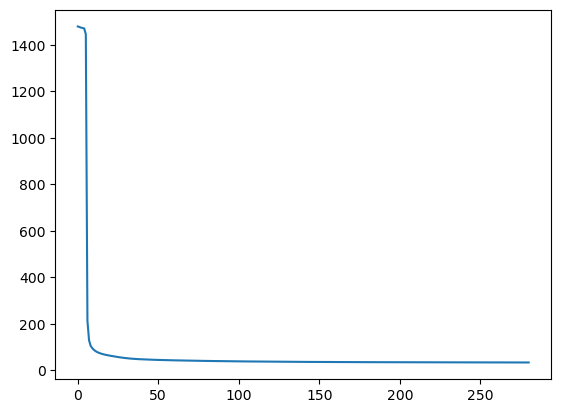

In [290]:
model.load_state_dict(best_weights)
print("MSE: %.3f" % best_mse)
print("RMSE: %.3f" % np.sqrt(best_mse))
print("MAPE: %.3f" % (100*best_mape))
plt.plot(history)
plt.show()

## –í—ã–≤–æ–¥—ã

### –ë–ª–∞–≥–æ–¥–∞—Ä—è —Ö–æ—Ä–æ—à–µ–º—É –∫–∞—á–µ—Å—Ç–≤—É Front End –∫–æ–¥–∞ —Å–∞–π—Ç–∞ krisha.kz –Ω–∞–º —É–¥–∞–ª–æ—Å—å "—Å–ø–∞—Ä—Å–∏—Ç—å" –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.
### –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–ª—É—á–∏–ª—Å—è —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ —Å–æ—Å—Ç–∞–≤–∏–ª 8.79 –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE.